# Analysis of Retail Data 


Challenge Attempt Brief: <br>
The EDA's primary intention is to find the key insights from the retail data, and top questions that can be answered using the data. Kindly find the cummulative final responses at the end of the notebook and the mail to which the notebook was attached. <br>

Approach:<br>
- Data Loading and Preprocessing
- Basic EDA
- Feature focused Analysis
- Question/Domain based Analysis
- Key Insights & Important Questions

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder


### Data Preprocessing

In [3]:
sales_df = pd.read_csv('sales data-set.csv')
stores_df = pd.read_csv('stores data-set.csv')
features_df = pd.read_csv('Features.csv')

In [4]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,1/10/2010,20094.19,False
1,1,1,2/4/2010,57258.43,False
2,1,1,2/7/2010,16333.14,False
3,1,1,3/9/2010,16241.78,False
4,1,1,3/12/2010,22517.56,False


In [5]:
stores_df.head()

,Store,Type,Area
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')

In [8]:
# Merging all to all_data
all_data = sales_df.merge(features_df, on=['Store', 'Date','IsHoliday'], how='left')
all_data = all_data.merge(stores_df, on=['Store'], how='left')

In [9]:
all_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Area
0,1,1,2010-10-01,20094.19,False,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,A,151315
1,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
2,1,1,2010-07-02,16333.14,False,80.91,2.669,NaN,NaN,NaN,NaN,NaN,211.223533,7.787,A,151315
3,1,1,2010-09-03,16241.78,False,81.21,2.577,NaN,NaN,NaN,NaN,NaN,211.531248,7.787,A,151315
4,1,1,2010-12-03,22517.56,False,49.27,2.708,NaN,NaN,NaN,NaN,NaN,211.607193,7.838,A,151315


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430020 entries, 0 to 430019
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         430020 non-null  int64         
 1   Dept          430020 non-null  int64         
 2   Date          430020 non-null  datetime64[ns]
 3   Weekly_Sales  430020 non-null  float64       
 4   IsHoliday     430020 non-null  bool          
 5   Temperature   430020 non-null  float64       
 6   Fuel_Price    430020 non-null  float64       
 7   MarkDown1     155656 non-null  float64       
 8   MarkDown2     115800 non-null  float64       
 9   MarkDown3     141687 non-null  float64       
 10  MarkDown4     139899 non-null  float64       
 11  MarkDown5     156407 non-null  float64       
 12  CPI           430020 non-null  float64       
 13  Unemployment  430020 non-null  float64       
 14  Type          430020 non-null  object        
 15  Area          430

In [11]:
all_data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Area
count,430020.000000,430020.000000,430020,430020.000000,430020.000000,430020.00000,155656.000000,115800.000000,141687.000000,139899.000000,156407.000000,430020.000000,430020.000000,430020.000000
mean,22.175103,44.122734,2011-06-19 17:24:53.947258112,15855.891497,59.917997,3.36041,7194.638969,4347.994089,1415.689495,3325.491329,4595.113852,171.218511,7.957802,136858.749877
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.47200,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-15 00:00:00,2111.652500,46.510000,2.93500,2241.190000,43.000000,5.200000,498.540000,1869.980000,132.022667,6.891000,93638.000000
50%,22.000000,36.000000,2011-06-24 00:00:00,7546.000000,61.880000,3.44500,5320.710000,209.070000,25.750000,1433.430000,3330.230000,182.350989,7.866000,140167.000000
75%,33.000000,72.000000,2012-02-24 00:00:00,19965.532500,74.210000,3.73500,9104.000000,2436.750000,110.800000,3529.360000,5520.950000,212.512605,8.567000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.46800,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.779362,30.326822,NaN,22580.083242,18.495698,0.45714,8228.885405,12045.192881,9532.699433,6236.465679,5919.198985,39.160263,1.862634,60910.231903


In [12]:
all_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Area                     int64
dtype: object

In [13]:
## Data Cleaning
#Checking for missing values
all_data.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       274364
MarkDown2       314220
MarkDown3       288333
MarkDown4       290121
MarkDown5       273613
CPI                  0
Unemployment         0
Type                 0
Area                 0
dtype: int64

In [14]:
#Filling missing values
all_data.fillna(0, inplace=True)

In [15]:
all_data.sort_values(by=['Date'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Area
5304,1,38,2010-02-05,115564.35,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
363185,38,17,2010-02-05,428.55,False,49.47,2.962,0.00,0.00,0.00,0.00,0.00,126.442065,13.975,C,39690
186071,19,37,2010-02-05,2717.11,False,20.96,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.350,A,203819
164304,17,26,2010-02-05,7853.86,False,23.11,2.666,0.00,0.00,0.00,0.00,0.00,126.442065,6.548,B,93188
67425,7,67,2010-02-05,3894.45,False,10.53,2.580,0.00,0.00,0.00,0.00,0.00,189.381697,9.014,B,70713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197211,20,42,2012-10-26,9964.13,False,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293,A,203742
359414,37,83,2012-10-26,2098.16,False,74.39,3.506,19.54,5.22,1.55,0.00,1891.77,222.113657,6.228,C,39910
244091,25,13,2012-10-26,24581.56,False,56.69,3.882,4805.66,84.19,0.00,1073.49,730.76,216.151590,7.293,B,128107
95838,10,48,2012-10-26,2865.00,False,70.50,4.301,9657.93,63.30,100.00,1925.87,834.57,131.193097,6.943,B,126512


In [ ]:
# Adding Date related features for better analysis
all_data['Year'] = all_data['Date'].dt.year
all_data['Month'] = all_data['Date'].dt.month   
all_data['Day'] = all_data['Date'].dt.day
all_data['Year-Month'] = all_data['Date'].dt.to_period('M')
all_data['Day_of_week'] = all_data['Date'].dt.dayofweek


In [60]:
all_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Area,Year,Month,Day,Year-Month,Day_of_week
0,1,1,2010-10-01,20094.19,False,71.89,2.603,0.00,0.00,0.00,...,0.00,211.671989,7.838,A,151315,2010,10,1,2010-10,4
1,1,1,2010-04-02,57258.43,False,62.27,2.719,0.00,0.00,0.00,...,0.00,210.820450,7.808,A,151315,2010,4,2,2010-04,4
2,1,1,2010-07-02,16333.14,False,80.91,2.669,0.00,0.00,0.00,...,0.00,211.223533,7.787,A,151315,2010,7,2,2010-07,4
3,1,1,2010-09-03,16241.78,False,81.21,2.577,0.00,0.00,0.00,...,0.00,211.531248,7.787,A,151315,2010,9,3,2010-09,4
4,1,1,2010-12-03,22517.56,False,49.27,2.708,0.00,0.00,0.00,...,0.00,211.607193,7.838,A,151315,2010,12,3,2010-12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430015,45,98,2011-09-30,727.05,False,70.66,3.645,0.00,0.00,0.00,...,0.00,187.256664,8.625,B,118221,2011,9,30,2011-09,4
430016,45,98,2011-12-30,553.21,True,37.79,3.389,3604.35,43941.56,287.45,...,750.01,189.062016,8.523,B,118221,2011,12,30,2011-12,4
430017,45,98,2011-12-30,553.21,True,37.79,3.389,3604.35,43941.56,287.45,...,750.01,189.062016,8.523,B,118221,2011,12,30,2011-12,4
430018,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,...,3992.13,191.461281,8.684,B,118221,2012,8,31,2012-08,4


## Analysis of the Retail Dataset

### General EDA 
 Looking at the distribution of data and the relationnship between parameters

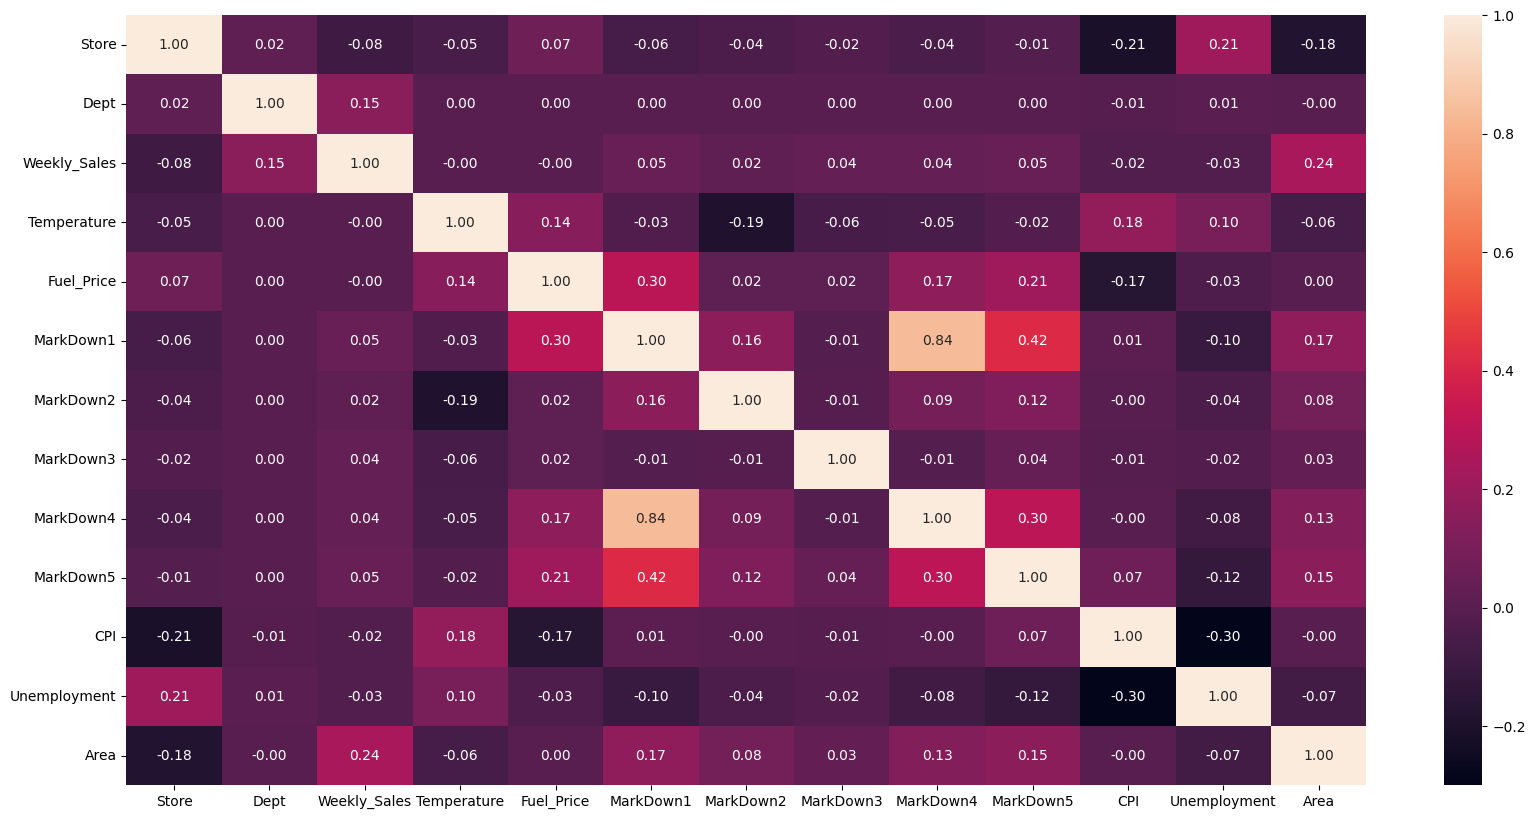

In [18]:
# Correlation Matrix/ Heatmap to check relationship between numerical variables 
numeric_data = all_data.select_dtypes(include=[np.float64, np.int64])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.show()


Weekly Sales is mostly not correlated with anything except - area of the stores<br>
CPI and Unemployment are negatively correlated<br>
CPI and Fuel Prices are negatively Correlated <br>
Certain markdowns are slightly correlated with Fuel Price <br>

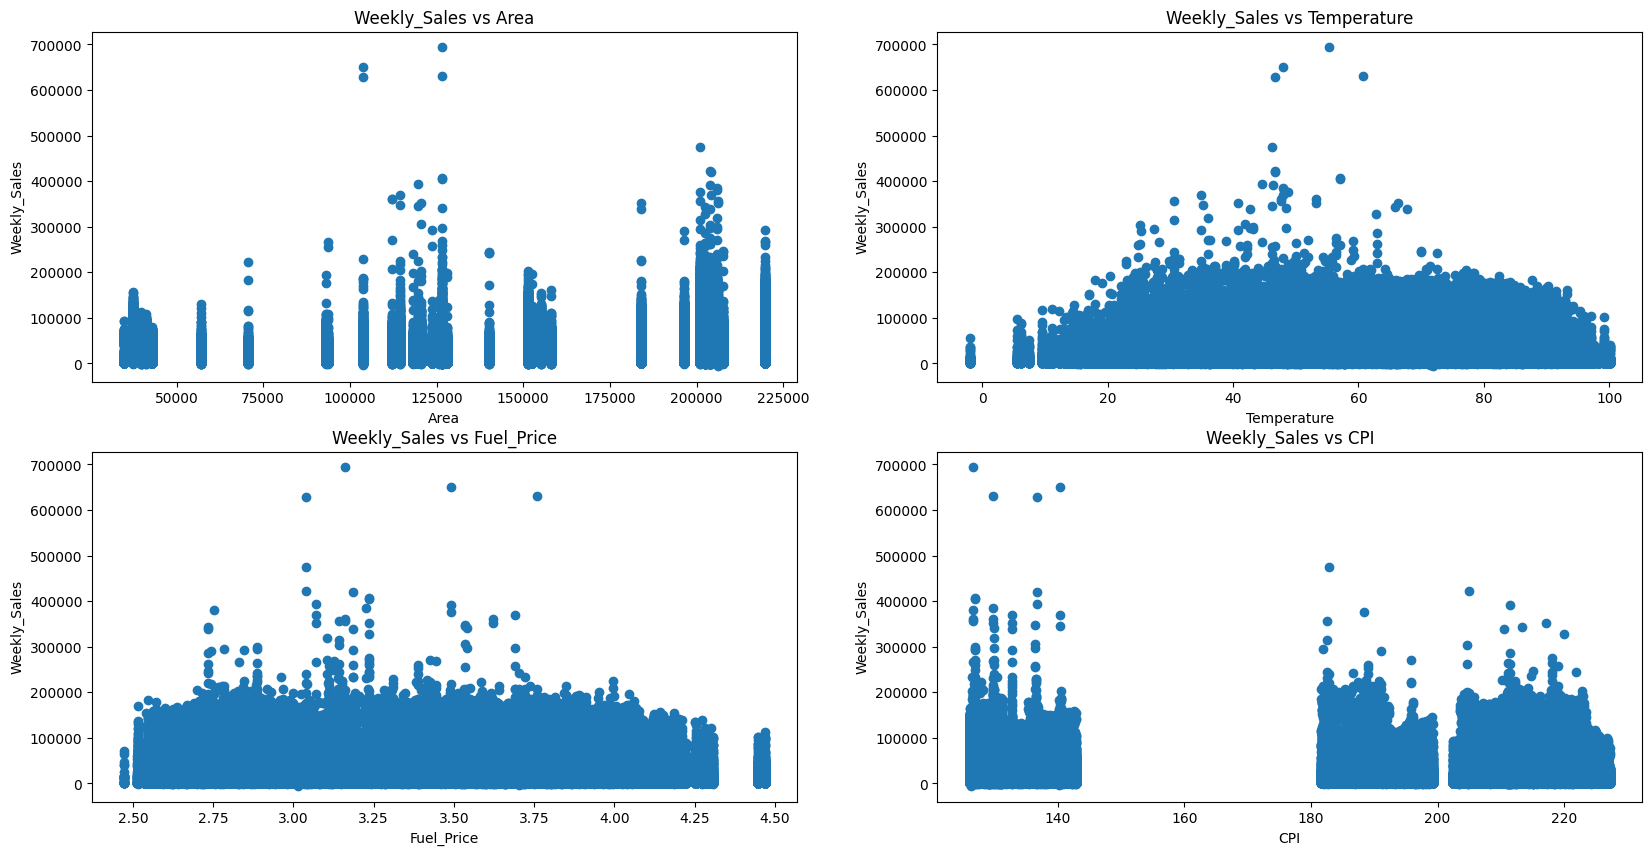

In [19]:
# Scatter plot of Weekly_Sales vs other numerical variables
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(all_data['Area'], all_data['Weekly_Sales'])
plt.title('Weekly_Sales vs Area')
plt.xlabel('Area')
plt.ylabel('Weekly_Sales')

plt.subplot(2,2,2)
plt.scatter(all_data['Temperature'], all_data['Weekly_Sales'])
plt.title('Weekly_Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

plt.subplot(2,2,3)
plt.scatter(all_data['Fuel_Price'], all_data['Weekly_Sales'])
plt.title('Weekly_Sales vs Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')

plt.subplot(2,2,4)
plt.scatter(all_data['CPI'], all_data['Weekly_Sales'])
plt.title('Weekly_Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')

plt.show()



There doesnt seem to be sense of relationship of Weekly Sales with temperature, Fuel Price while few high Weekly sales have been recorded when CPI was low (outliers)

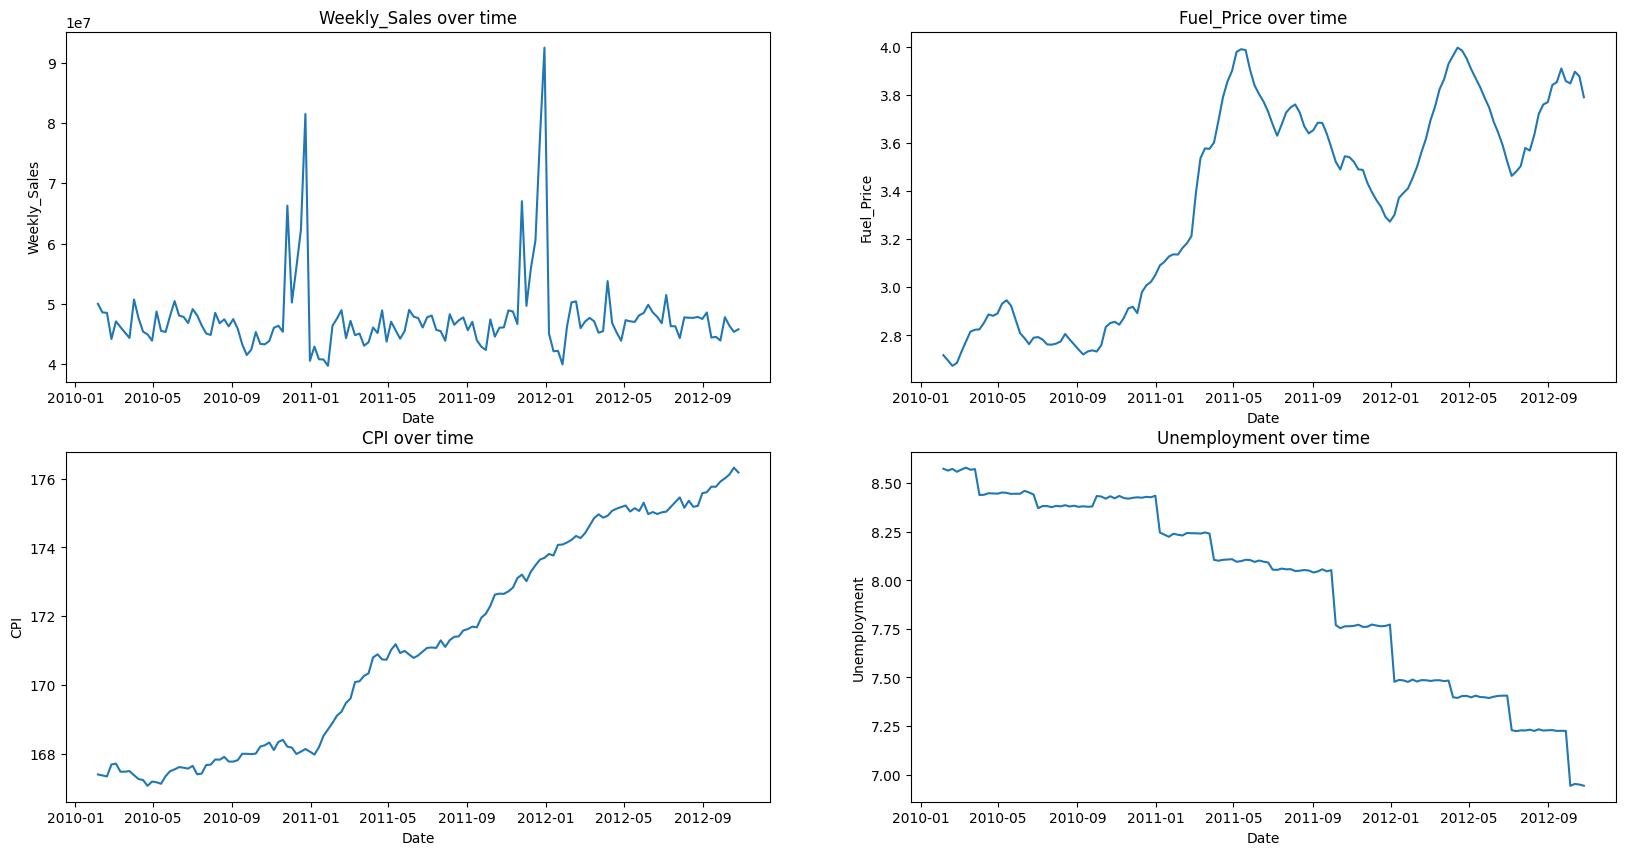

In [20]:
# Change in parameters over time
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(all_data.groupby('Date')['Weekly_Sales'].sum())
plt.title('Weekly_Sales over time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')

plt.subplot(2,2,2)
plt.plot(all_data.groupby('Date')['Fuel_Price'].mean())
plt.title('Fuel_Price over time')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')

plt.subplot(2,2,3)
plt.plot(all_data.groupby('Date')['CPI'].mean())
plt.title('CPI over time')
plt.xlabel('Date')
plt.ylabel('CPI')

plt.subplot(2,2,4)
plt.plot(all_data.groupby('Date')['Unemployment'].mean())
plt.title('Unemployment over time')
plt.xlabel('Date')
plt.ylabel('Unemployment')

plt.show()



- We can observe two peaks in the sales data, on peak holiday season of Christmas in both 2011 & 2012.
- CPI  Has increased overtime while Unemployment has decreased over time in a step like manner
- Fuel price while getting cheaper in late 2011, witnesssed a gradual increase over the years.

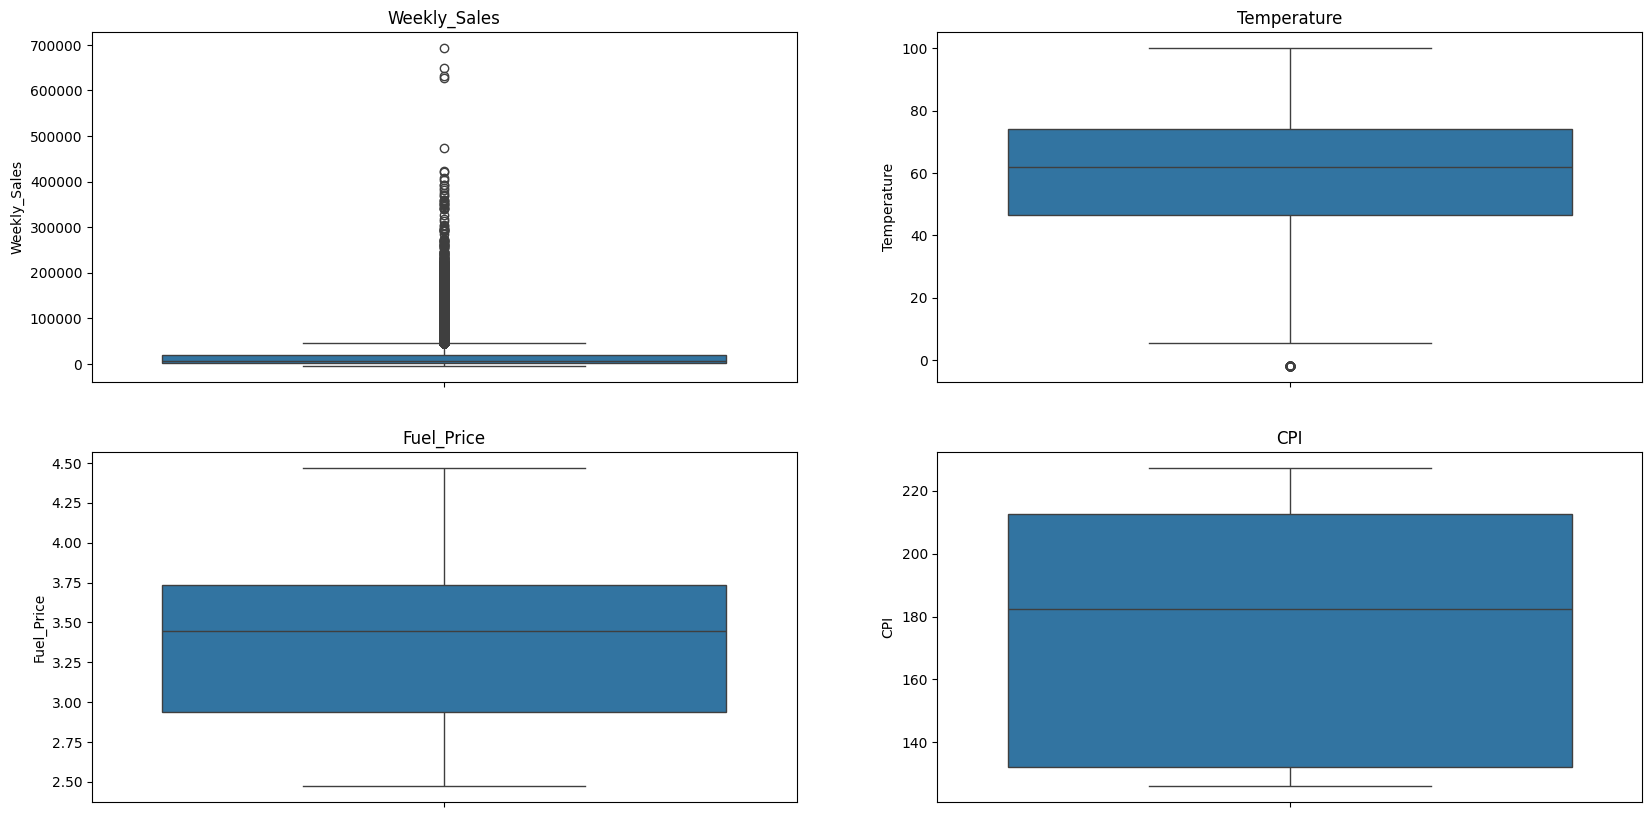

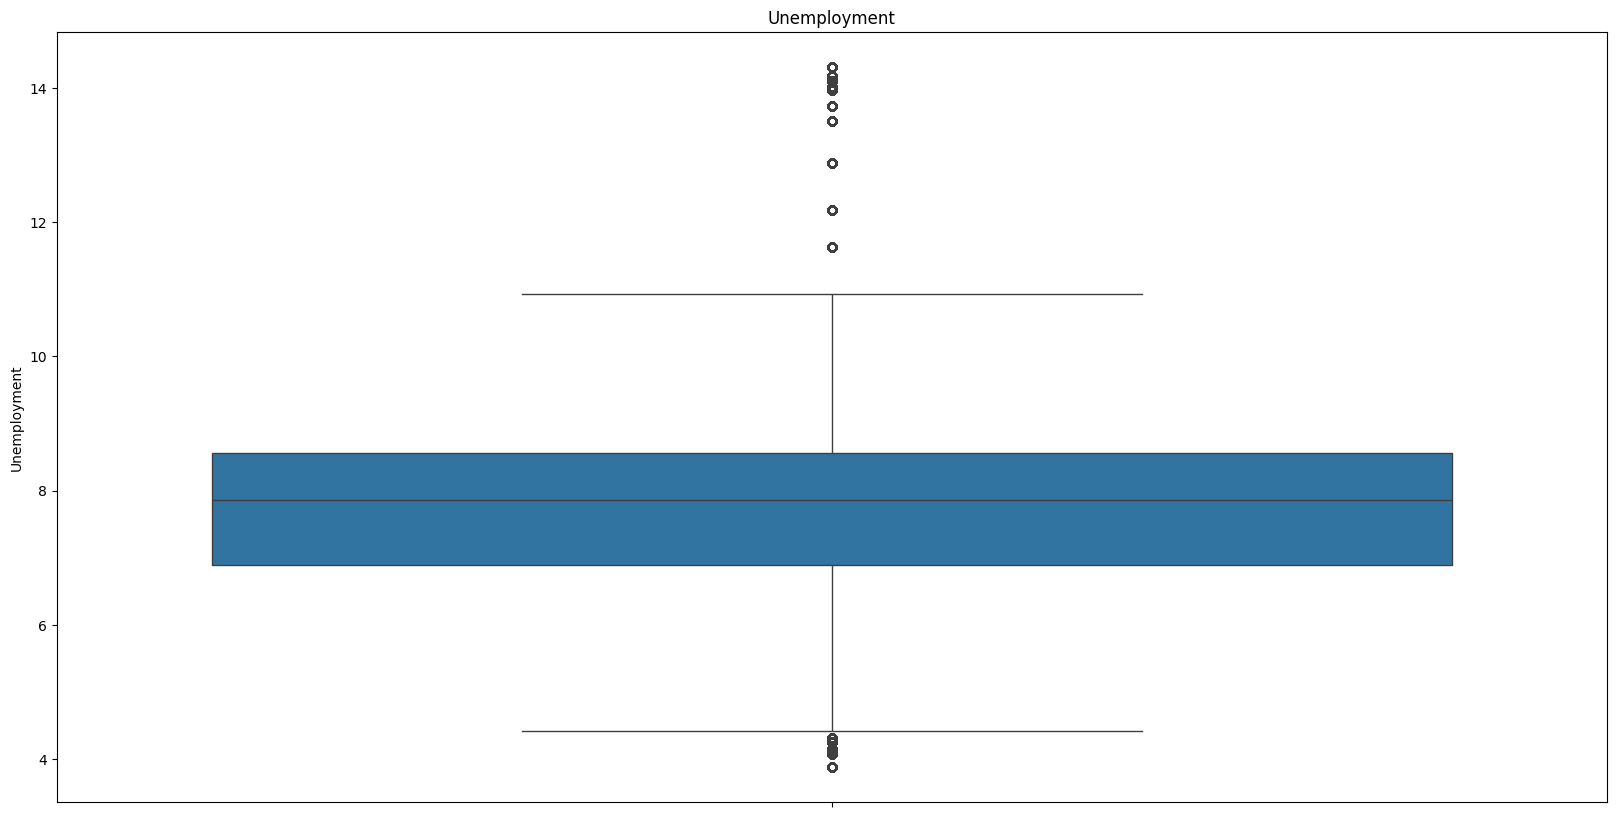

In [21]:
# Checking outlier distribution of all numerical parameters in the datset
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(all_data['Weekly_Sales'])
plt.title('Weekly_Sales')

plt.subplot(2,2,2)
sns.boxplot(all_data['Temperature'])
plt.title('Temperature')

plt.subplot(2,2,3)
sns.boxplot(all_data['Fuel_Price'])
plt.title('Fuel_Price')

plt.subplot(2,2,4)
sns.boxplot(all_data['CPI'])
plt.title('CPI')

plt.figure(figsize=(20,10))
sns.boxplot(all_data['Unemployment'])
plt.title('Unemployment')
plt.show()

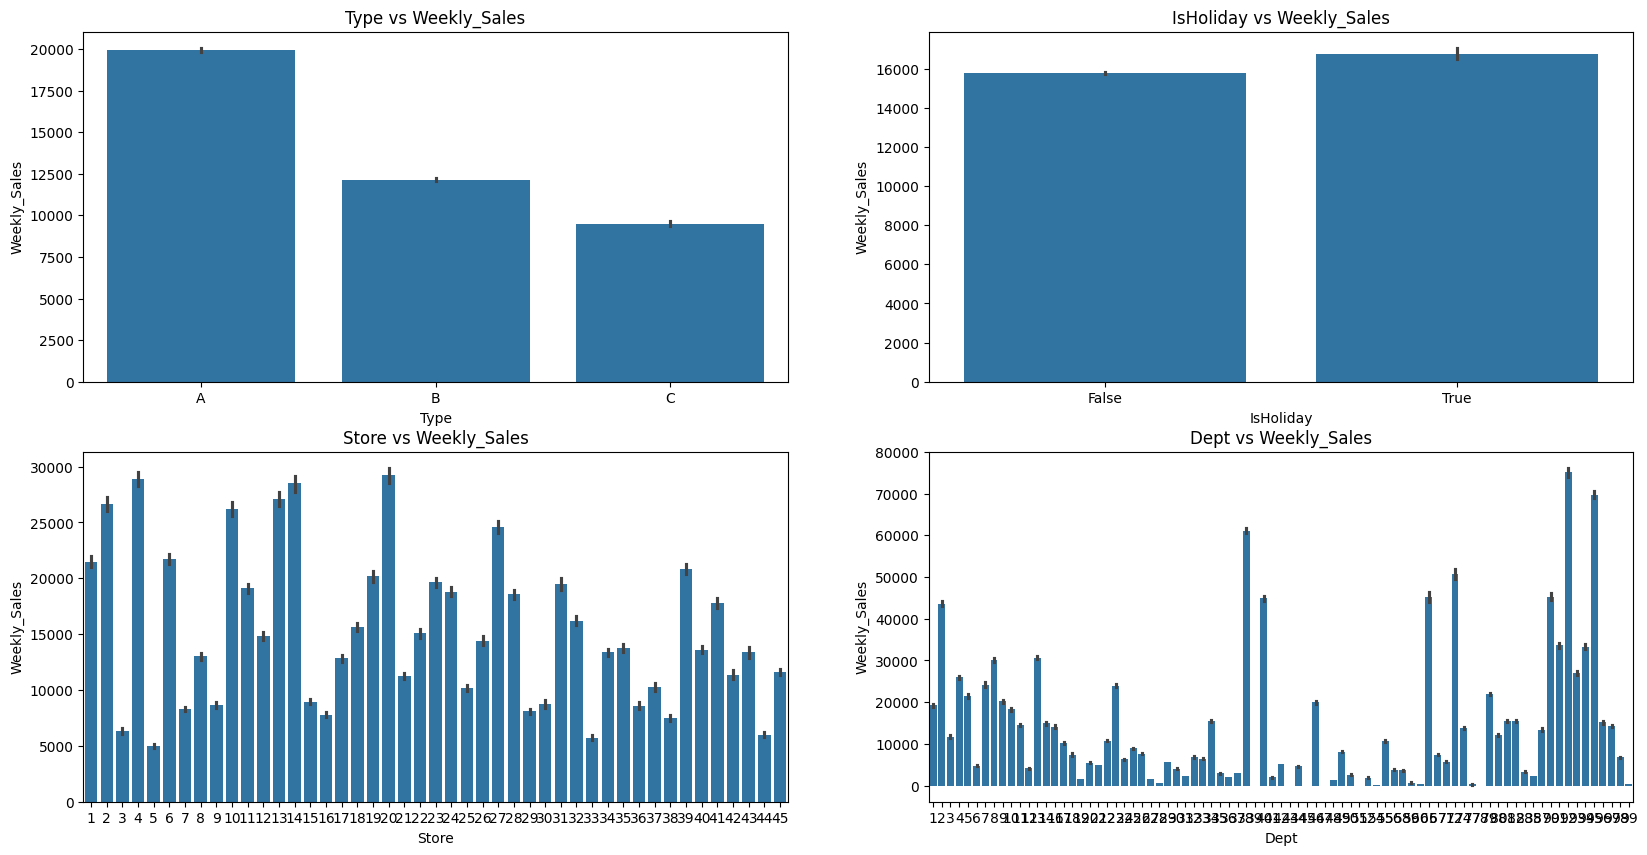

In [22]:
# Bar plots for all categorical attributes wrt Weekly_Sales 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='Type', y='Weekly_Sales', data=all_data)
plt.title('Type vs Weekly_Sales')

plt.subplot(2,2,2)
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=all_data)
plt.title('IsHoliday vs Weekly_Sales')

plt.subplot(2,2,3)
sns.barplot(x='Store', y='Weekly_Sales', data=all_data)
plt.title('Store vs Weekly_Sales')

plt.subplot(2,2,4)
sns.barplot(x='Dept', y='Weekly_Sales', data=all_data)
plt.title('Dept vs Weekly_Sales')

plt.show()



- Store type A witnessed the maximum amount of sales overall
- Generally more revenue was generated during holiday weeks

Text(0.5, 1.0, 'Observation count in each year')

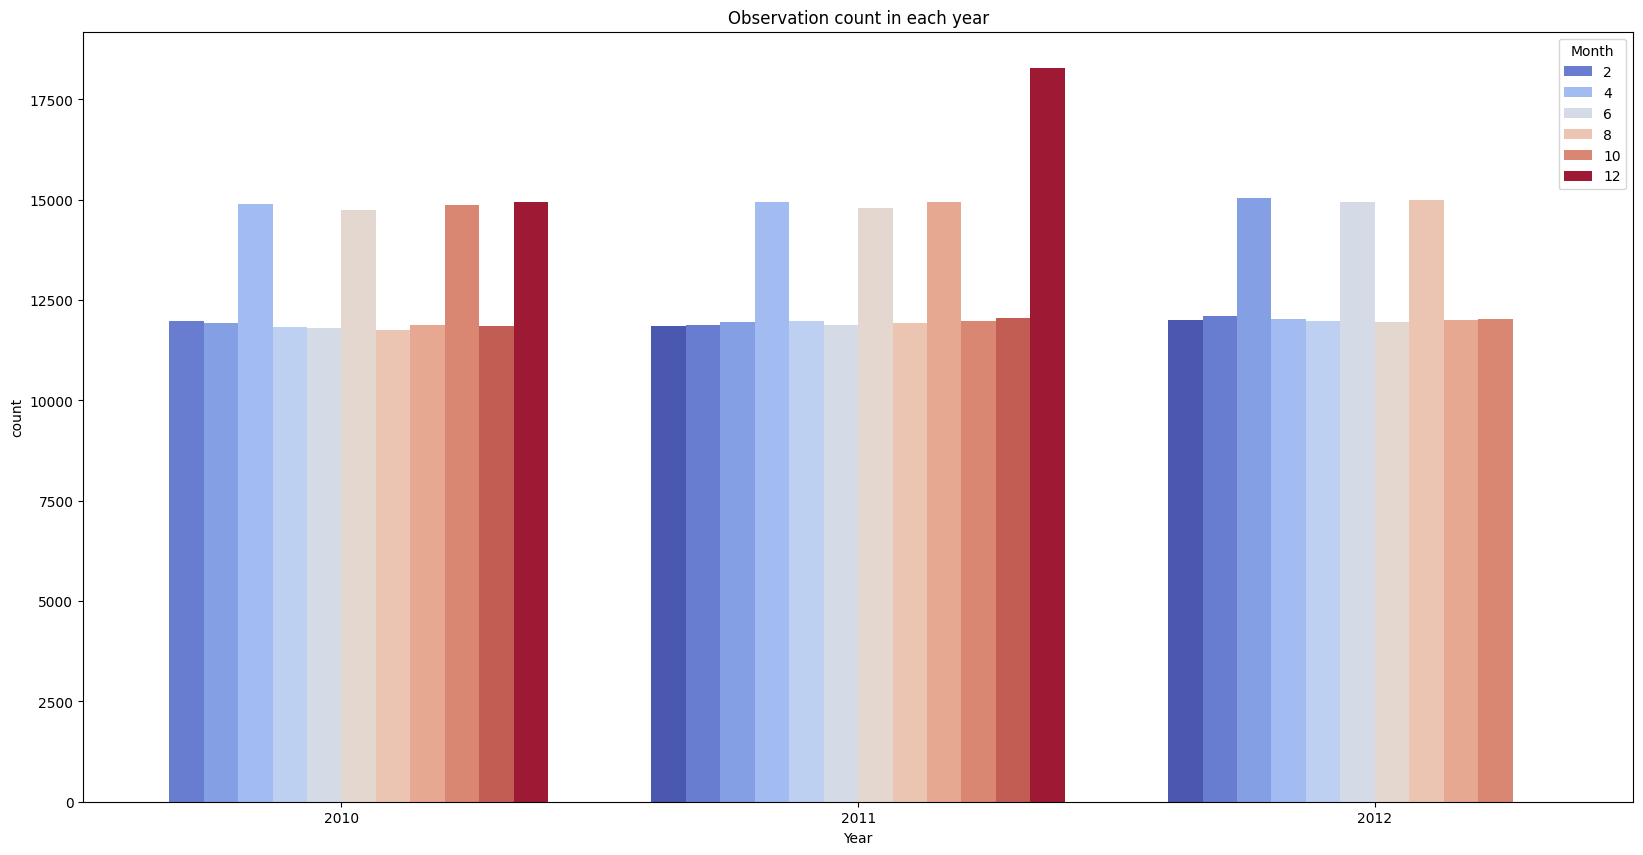

In [138]:
# Bar plots for observations count for each month in each year 
plt.subplots(figsize = (20,10))
sns.countplot(data = all_data,x='Year',hue='Month',palette='coolwarm')
plt.title('Observation count in each year')


April, July, September have recorded high sales while December seems to have recorded the highest weekly sales, owing to the holiday season

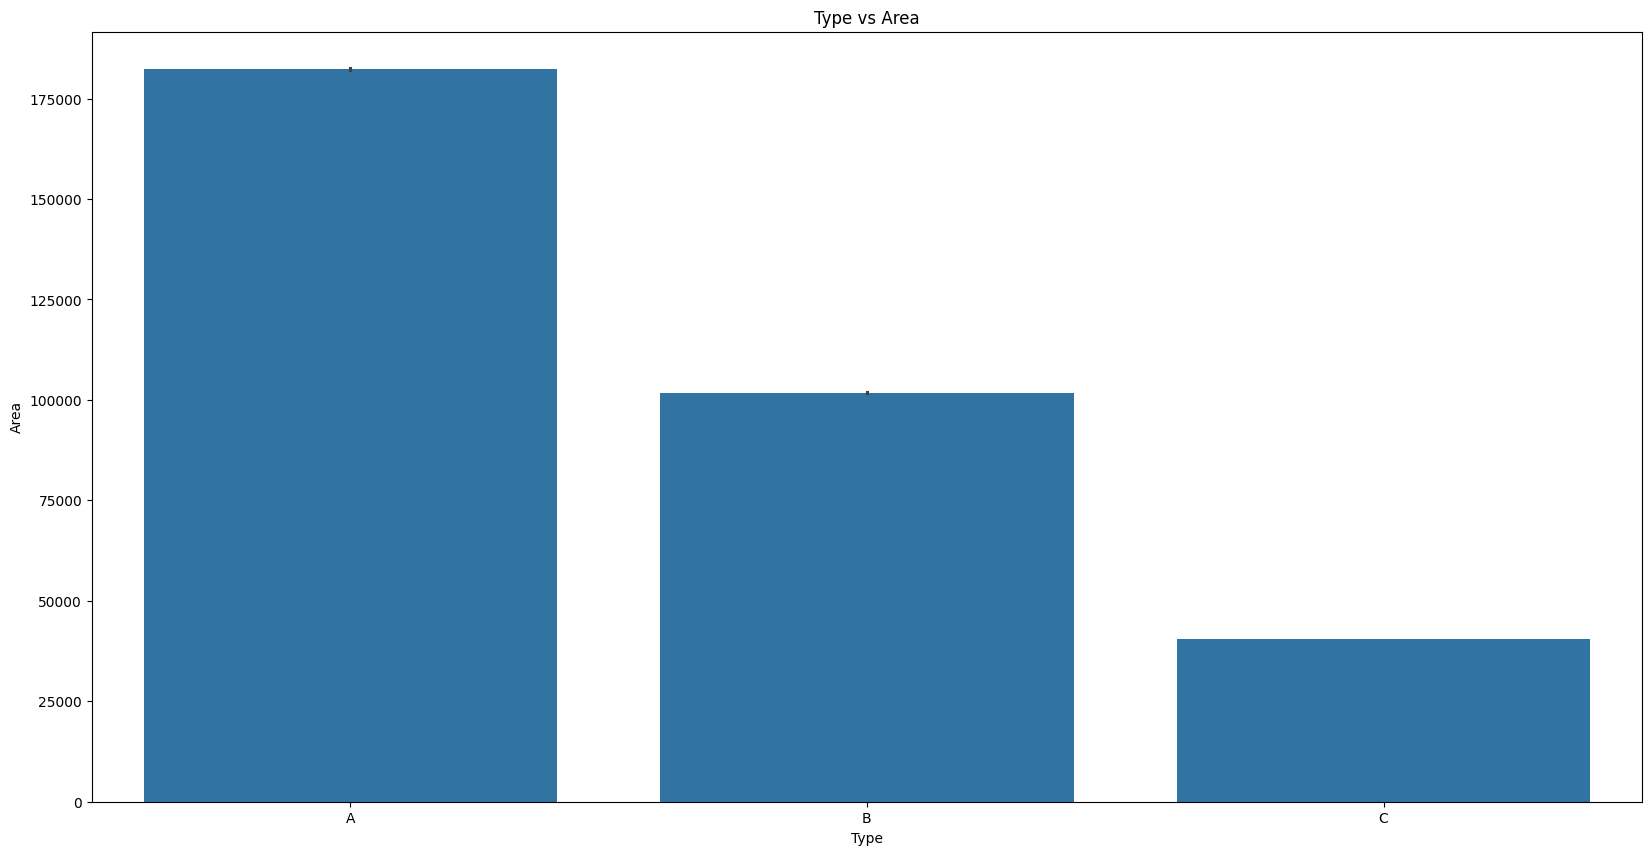

In [85]:
# Checking Type and area relattionship: avg area of each type
plt.figure(figsize=(20,10))
sns.barplot(x='Type', y='Area', data=all_data)
plt.title('Type vs Area')
plt.show()


There is a relation between area and store type.  Area of store type A is the largest followed by B and C. 

### Preliminary Analysis of Weekly Sales

The Preliminary Analysis aims to explore Weekly sales parameter - which is the primary indicator for success of a store. It includes answering questions like the best performing store, department, best calendar year for sales, and other information oriented insights.

In [38]:
# Top and least performing Stores wrt weekly Sales across all store overall and yearly
total_sales_per_store = all_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sales_per_store = total_sales_per_store.sort_values(by='Weekly_Sales', ascending=False)
yearly_sales_per_store = all_data.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
yearly_sales_per_store = yearly_sales_per_store.sort_values(by='Weekly_Sales', ascending=False)


top_performing_store_overall = pd.DataFrame(total_sales_per_store.head(5)).reset_index(drop=True)

#least 5 performing stores overall
least_performing_store_overall = pd.DataFrame(total_sales_per_store.tail(5)).reset_index(drop=True)

top_performing_store_yearly = pd.DataFrame(yearly_sales_per_store.groupby('Year').head()).reset_index(drop=True)
least_performing_store_yearly = pd.DataFrame(yearly_sales_per_store.groupby('Year').tail()).reset_index(drop=True)


print('Top 5 performing stores overall')
print(top_performing_store_overall)
print('\n')
print('Least 5 performing stores overall')
print(least_performing_store_overall)
print('\n')
print('Top 5 performing stores yearly')
print(top_performing_store_yearly)
print('\n')
print('Least 5 performing stores yearly')
print(least_performing_store_yearly)






Top 5 performing stores overall
   Store  Weekly_Sales
0     20  3.048042e+08
1      4  3.033219e+08
2     14  2.922812e+08
3     13  2.900557e+08
4      2  2.783337e+08


Least 5 performing stores overall
   Store  Weekly_Sales
0     38   55502503.33
1     36   53699630.72
2      5   46055542.02
3     44   43557195.32
4     33   37375985.00


Top 5 performing stores yearly
    Store  Year  Weekly_Sales
0       4  2011  1.137662e+08
1      20  2011  1.123638e+08
2      14  2011  1.085119e+08
3      13  2011  1.070885e+08
4      14  2010  1.059803e+08
5      20  2010  1.022467e+08
6      10  2011  1.016557e+08
7       4  2010  9.626314e+07
8      13  2010  9.583252e+07
9       2  2010  9.568903e+07
10      4  2012  9.329247e+07
11     20  2012  9.019366e+07
12     13  2012  8.713468e+07
13      2  2012  8.176522e+07
14     10  2012  7.880544e+07


Least 5 performing stores yearly
    Store  Year  Weekly_Sales
0      38  2011   20283503.88
1      36  2011   19260043.97
2       3  2010   

General Top performers: Store 20,14,4. General weak performers: 38,36,5

In [40]:
# Top and least performing departments across stores overall and yearly
total_sales_per_dept = all_data.groupby('Dept')['Weekly_Sales'].sum().reset_index()
total_sales_per_dept = total_sales_per_dept.sort_values(by='Weekly_Sales', ascending=False)

yearly_sales_per_dept = all_data.groupby([ 'Dept', 'Year'])['Weekly_Sales'].sum().reset_index()
yearly_sales_per_dept = yearly_sales_per_dept.sort_values(by='Weekly_Sales', ascending=False)

top_performing_dept_overall = pd.DataFrame(total_sales_per_dept.head(5)).reset_index(drop=True)l
least_performing_dept_overall = pd.DataFrame(total_sales_per_dept.tail(5)).reset_index(drop=True)
top_performing_dept_yearly = pd.DataFrame(yearly_sales_per_dept.groupby('Year').head()).reset_index(drop=True)
least_performing_dept_yearly = pd.DataFrame(yearly_sales_per_dept.groupby('Year').tail()).reset_index(drop=True)


print('Top 5 performing departments overall')
print(top_performing_dept_overall)
print('\n')
print('Least 5 performing departments overall')
print(least_performing_dept_overall)
print('\n')
print('Top 5 performing departments yearly')
print(top_performing_dept_yearly)
print('\n')
print('Least 5 performing departments yearly')
print(least_performing_dept_yearly)



Top 5 performing departments overall
   Dept  Weekly_Sales
0    92  4.868579e+08
1    95  4.518053e+08
2    38  3.956323e+08
3    72  3.083904e+08
4    90  2.929854e+08


Least 5 performing departments overall
   Dept  Weekly_Sales
0    51      30572.83
1    78       1724.71
2    39        177.98
3    43         14.32
4    47      -6575.43


Top 5 performing departments yearly
    Dept  Year  Weekly_Sales
0     92  2011  1.793909e+08
1     95  2011  1.640550e+08
2     92  2010  1.558376e+08
3     92  2012  1.516294e+08
4     95  2010  1.498584e+08
5     38  2011  1.457754e+08
6     95  2012  1.378918e+08
7     38  2010  1.288553e+08
8     38  2012  1.210016e+08
9     72  2011  1.175737e+08
10    72  2010  1.105091e+08
11    90  2011  1.098652e+08
12    40  2010  9.641509e+07
13    90  2012  8.971536e+07
14    40  2012  8.919934e+07


Least 5 performing departments yearly
    Dept  Year  Weekly_Sales
0     51  2011       5840.73
1     47  2012       1095.31
2     78  2011        407.52


General top departments across stores: 92,95 . Weak : 51,78

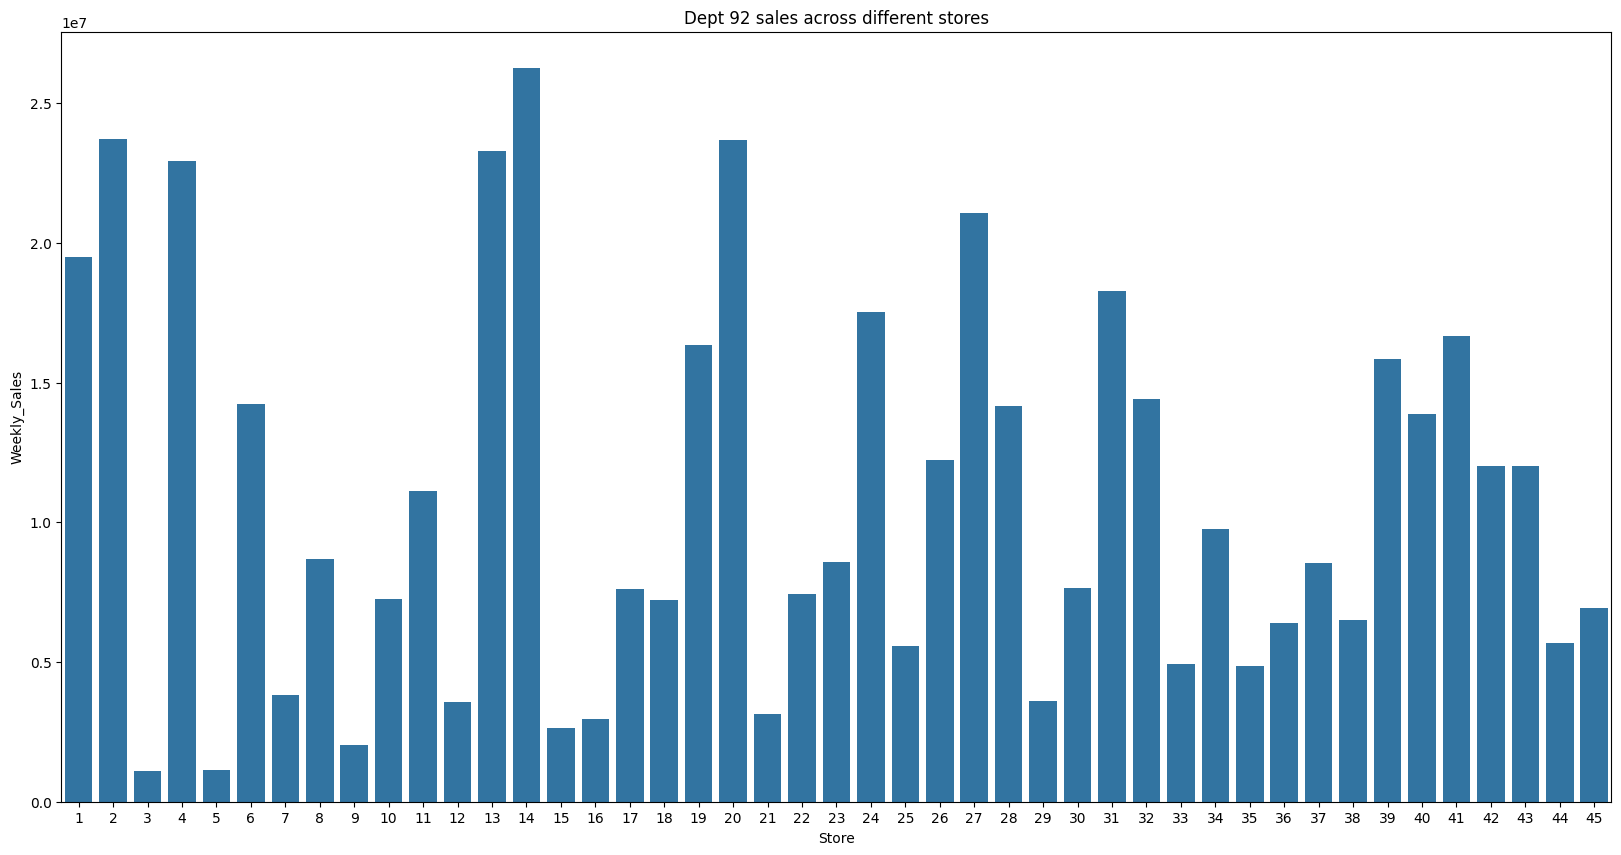

In [41]:
# Dept 92 sales across different stores
dept_92_sales = all_data[all_data['Dept'] == 92].groupby('Store')['Weekly_Sales'].sum().reset_index()
dept_92_sales = dept_92_sales.sort_values(by='Weekly_Sales', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Weekly_Sales', data=dept_92_sales)
plt.title('Dept 92 sales across different stores')
plt.show()

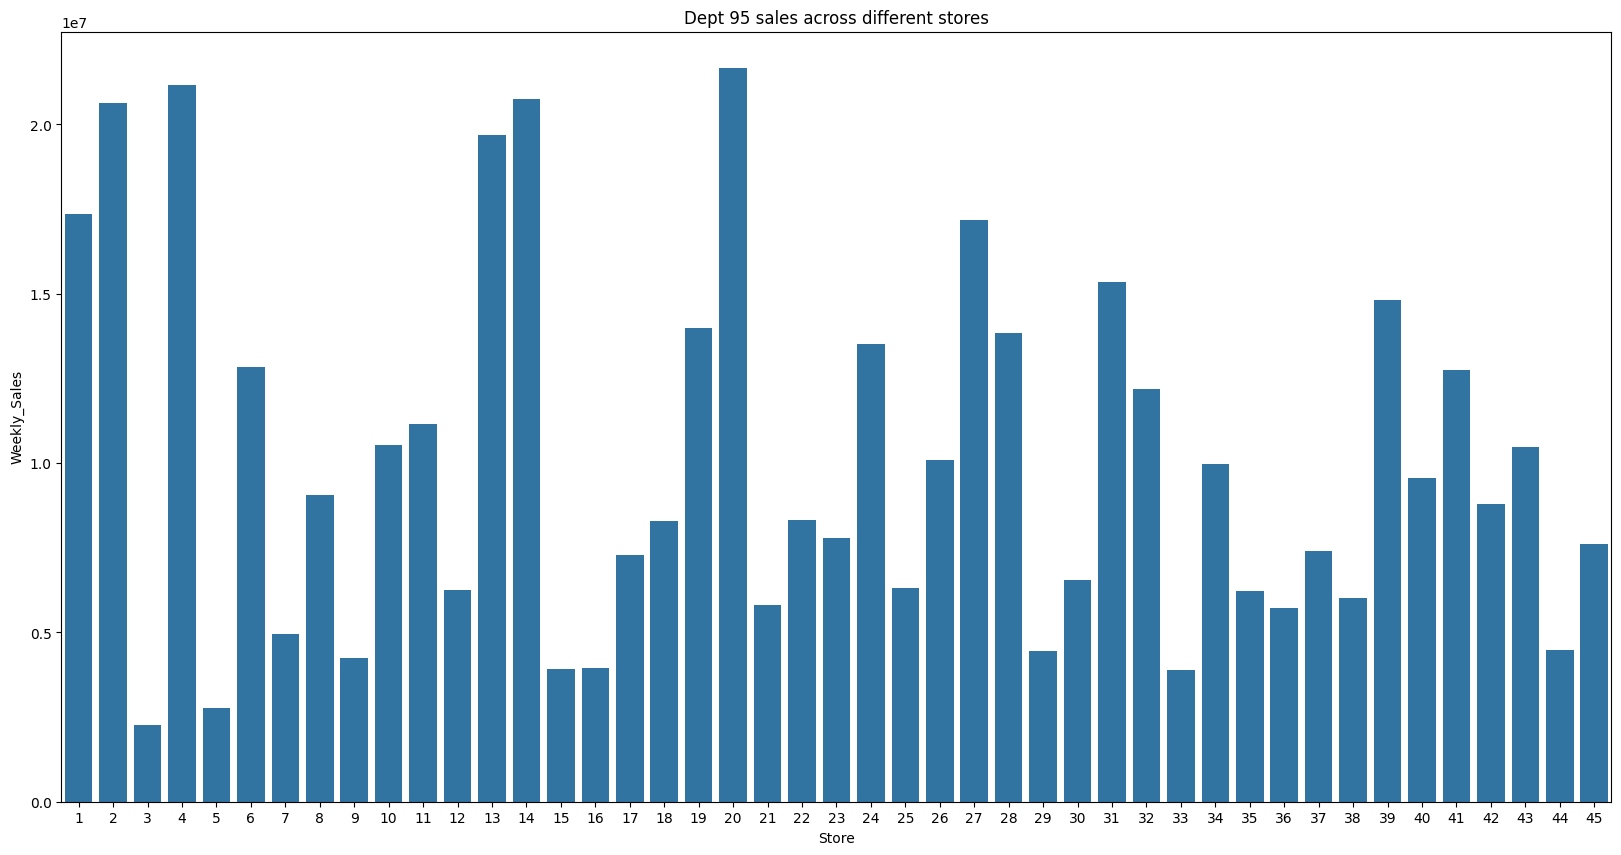

In [42]:
#dept 95 sales across different stores
dept_95_sales = all_data[all_data['Dept'] == 95].groupby('Store')['Weekly_Sales'].sum().reset_index()
dept_95_sales = dept_95_sales.sort_values(by='Weekly_Sales', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Weekly_Sales', data=dept_95_sales)
plt.title('Dept 95 sales across different stores')
plt.show()

<b>This coincides witth the stores results: Top performing stores were 20,4,13,14 and We can observe that the top performing departments 95,92 have high peaks in those stores compared to others.

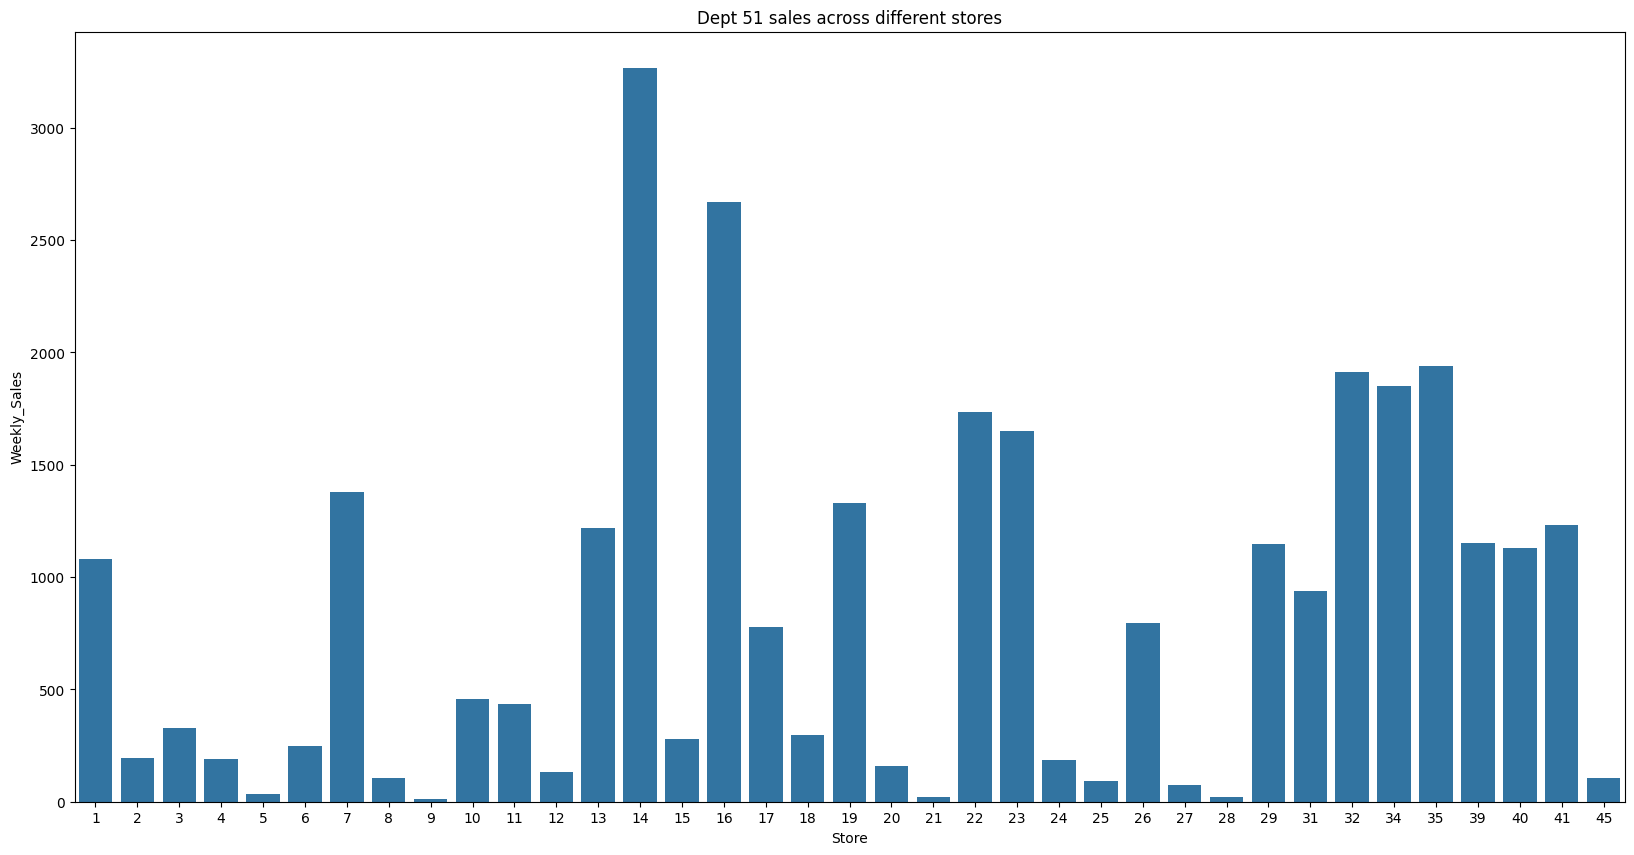

In [43]:
#dept 51 sales across different stores
dept_51_sales = all_data[all_data['Dept'] == 51].groupby('Store')['Weekly_Sales'].sum().reset_index()
dept_51_sales = dept_51_sales.sort_values(by='Weekly_Sales', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Weekly_Sales', data=dept_51_sales)
plt.title('Dept 51 sales across different stores')
plt.show()

In [50]:
# Top and least performing  store type wrt. weekly sales overall and yearly
total_sales_per_type = all_data.groupby('Type')['Weekly_Sales'].sum().reset_index()
total_sales_per_type = total_sales_per_type.sort_values(by='Weekly_Sales', ascending=False)

yearly_sales_per_type = all_data.groupby([ 'Type', 'Year'])['Weekly_Sales'].sum().reset_index()
yearly_sales_per_type = yearly_sales_per_type.sort_values(by='Weekly_Sales', ascending=False)

#top performing store type overall
top_performing_type_overall = pd.DataFrame(total_sales_per_type).reset_index(drop=True)

#top performing store type yearly
top_performing_type_yearly = pd.DataFrame(yearly_sales_per_type.groupby('Year').head(5)).reset_index(drop=True)


print('Top performing store type overall')
print(top_performing_type_overall)
print('\n')
print('Top performing store type yearly')
top_performing_type_yearly



Top performing store type overall
  Type  Weekly_Sales
0    A  4.380303e+09
1    B  2.030149e+09
2    C  4.078986e+08


Top performing store type yearly


,Type,Year,Weekly_Sales
0,A,2011,1.614844e+09
1,A,2010,1.472625e+09
2,A,2012,1.292834e+09
3,B,2011,7.438400e+08
4,B,2010,6.955331e+08
5,B,2012,5.907756e+08
6,C,2011,1.482677e+08
7,C,2010,1.334781e+08
8,C,2012,1.261527e+08


In [139]:
# Top performing weeks in sales across years. top performing months overall
weekly_sales = all_data.groupby('Year-Month')['Weekly_Sales'].sum().reset_index()
weekly_sales = weekly_sales.sort_values(by='Weekly_Sales', ascending=False)


print('Top performing weeks in sales')
print(weekly_sales)



Top performing weeks in sales
   Year-Month  Weekly_Sales
22    2011-12  3.362063e+08
10    2010-12  2.906589e+08
28    2012-06  2.416332e+08
30    2012-08  2.385291e+08
5     2010-07  2.336640e+08
2     2010-04  2.326537e+08
25    2012-03  2.326145e+08
17    2011-07  2.309497e+08
14    2011-04  2.276172e+08
19    2011-09  2.219562e+08
8     2010-10  2.182915e+08
21    2011-11  2.113722e+08
9     2010-11  2.040965e+08
4     2010-06  1.931936e+08
24    2012-02  1.929349e+08
0     2010-02  1.913215e+08
16    2011-06  1.906561e+08
18    2011-08  1.898904e+08
26    2012-04  1.897957e+08
27    2012-05  1.895584e+08
6     2010-08  1.890554e+08
29    2012-07  1.884118e+08
3     2010-05  1.876504e+08
12    2011-02  1.872525e+08
32    2012-10  1.853665e+08
20    2011-10  1.841753e+08
1     2010-03  1.828793e+08
15    2011-05  1.824265e+08
31    2012-09  1.814836e+08
13    2011-03  1.801780e+08
7     2010-09  1.781711e+08
23    2012-01  1.694346e+08
11    2011-01  1.642718e+08


December as seen earlier seems to have the highest sales recorded in 2011 and 2010. This is followed by June, August of 2012 and July of 2010 <br>
We observe low sales generally in the month of January post the holiday season

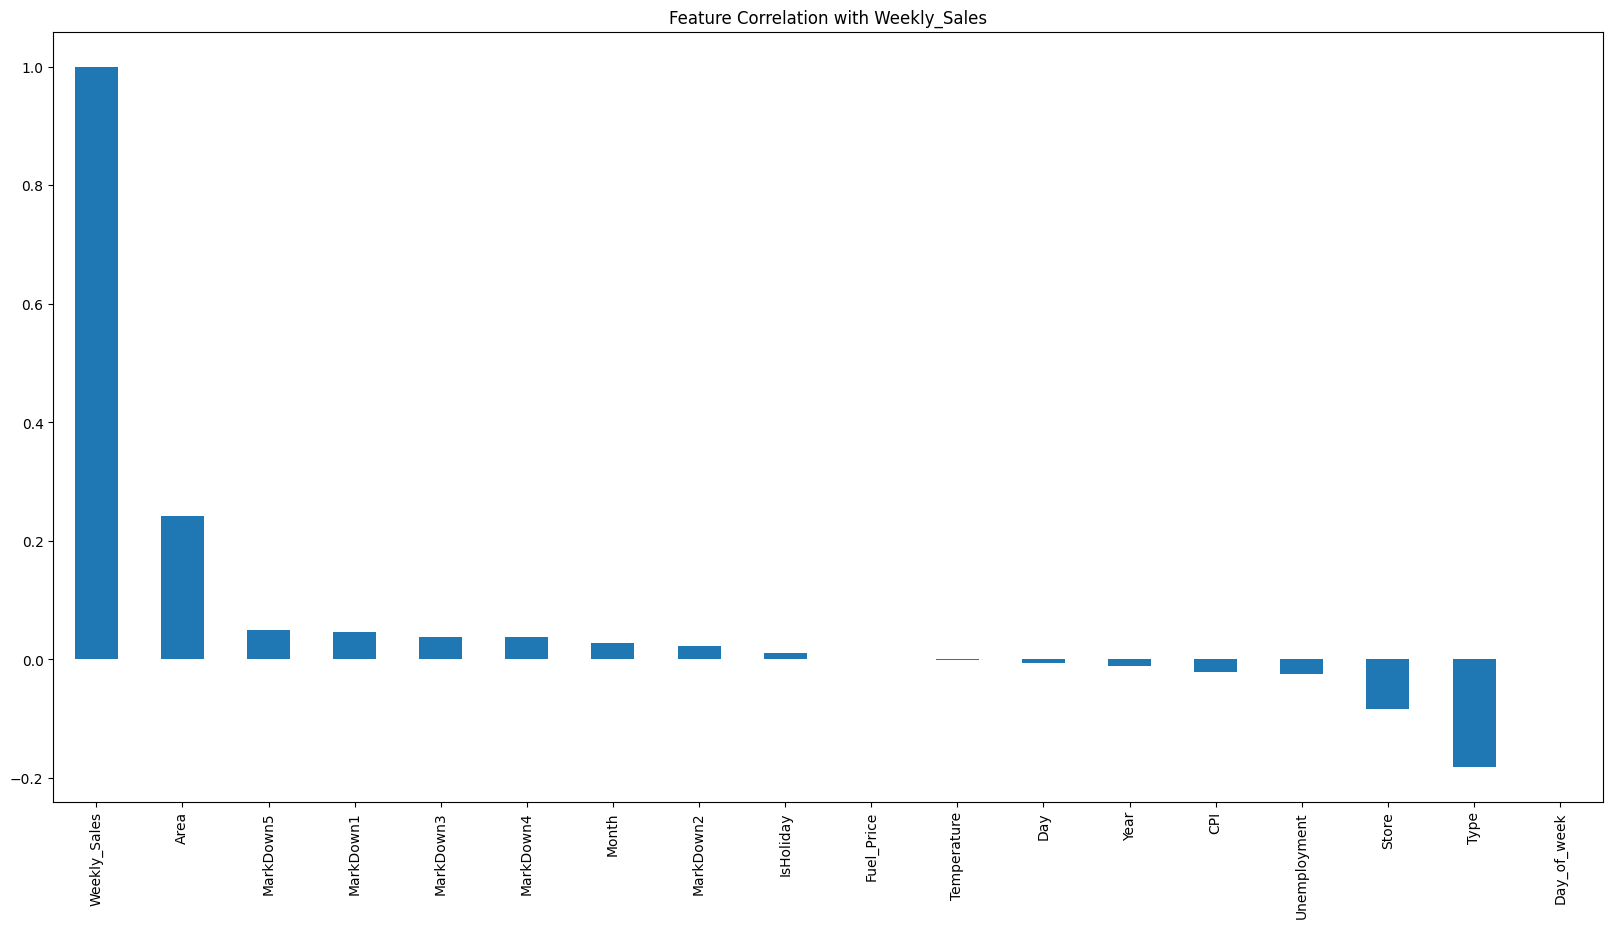

In [65]:
# Finding out what parameters primarily affect weekly sales = feature importance checking.

data = all_data.copy()
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])
data['IsHoliday'] = data['IsHoliday'].astype(int)
data.drop(['Date', 'Year-Month','Dept'], axis=1, inplace=True)

# correlation Analysis
correlations = data.corr()['Weekly_Sales'].sort_values(ascending=False)

#plot
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')
plt.title('Feature Correlation with Weekly_Sales')
plt.show()





    

### Analysis Based on Feature domains and questions

#### Performance & Efficiency

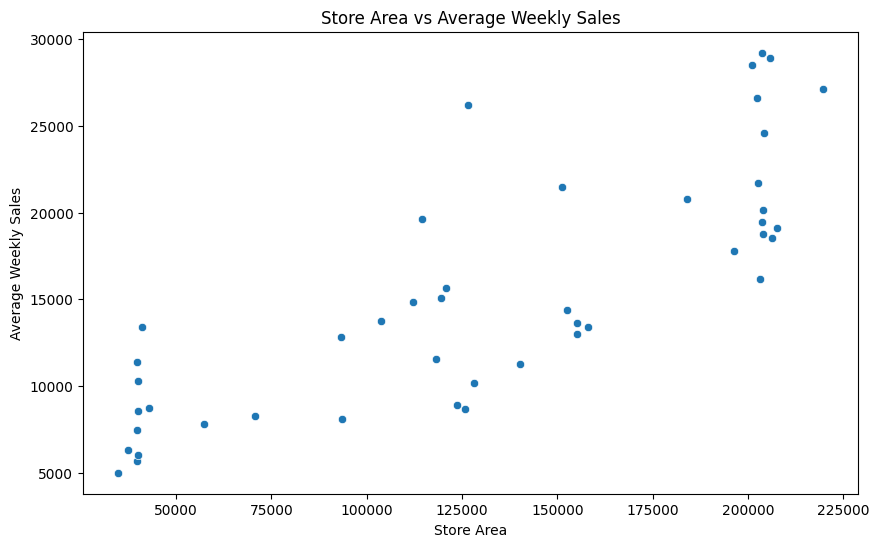

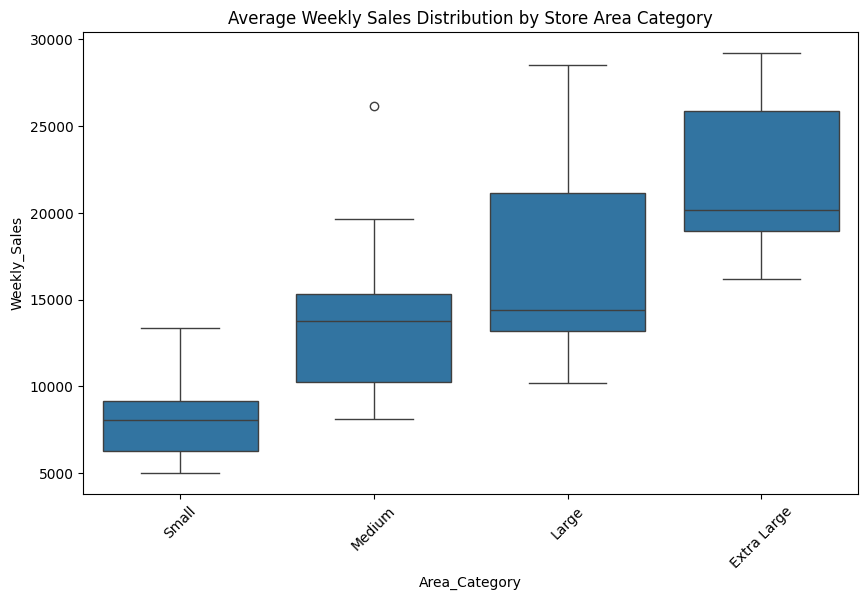


Sales Statistics by Store Area Category:
                       mean          std  count
Area_Category                                  
Small           8244.280862  2470.896446     12
Medium         14107.951447  5297.555978     11
Large          17368.076023  6207.976151     11
Extra Large    22169.661812  4549.615629     11


C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_24788\1682792149.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [81]:
# Does Area of the store affect weekly sales?

store_sales = all_data.groupby('Store')['Weekly_Sales'].mean().reset_index()
Area = stores_df[['Store', 'Area']]
store_analysis = pd.merge(store_sales, Area, on='Store')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_analysis, x='Area', y='Weekly_Sales')
plt.title('Store Area vs Average Weekly Sales')
plt.xlabel('Store Area')
plt.ylabel('Average Weekly Sales')
plt.show()

store_analysis['Area_Category'] = pd.qcut(store_analysis['Area'], q=4, labels=['Small', 'Medium', 'Large', 'Extra Large'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=store_analysis, x='Area_Category', y='Weekly_Sales')
plt.title('Average Weekly Sales Distribution by Store Area Category')
plt.xticks(rotation=45)
plt.show()

area_category_stats = store_analysis.groupby('Area_Category')['Weekly_Sales'].agg(['mean', 'std', 'count'])
print("\nSales Statistics by Store Area Category:")
print(area_category_stats)

<b>Area positively impacts sales -> The Bigger the stores , the higher the weekly sales recoreded. Direction -> Construction of bigger stores going forth. Considering the relation between Store Area and Type, Type A stores with large area fetches high retail weekly sales

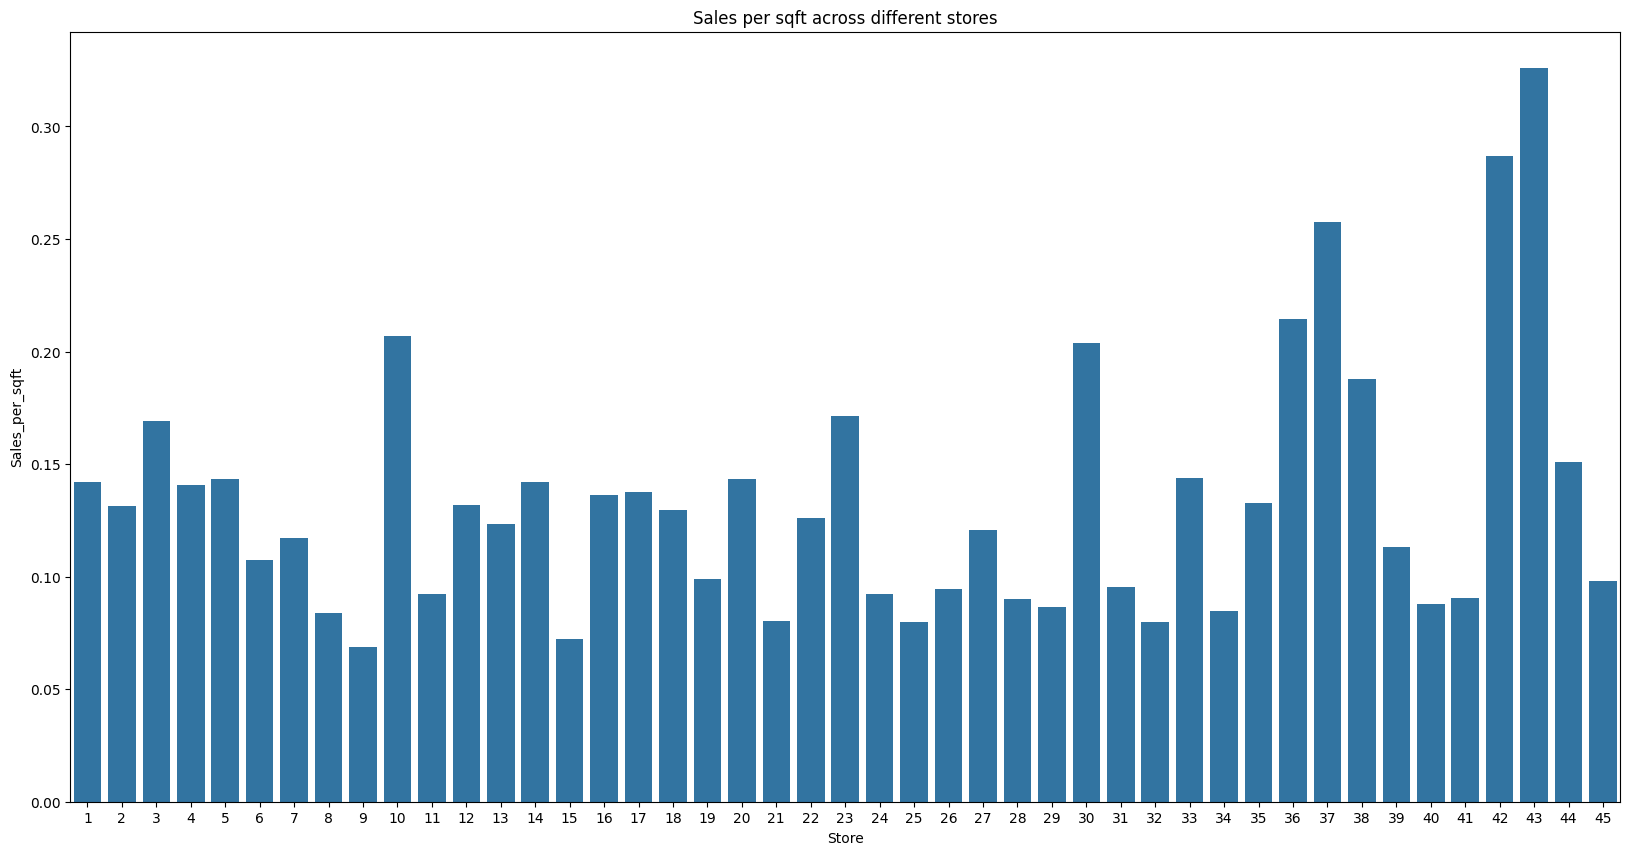

,Store,Sales_per_sqft
42,43,0.325777
41,42,0.286871
36,37,0.257370
35,36,0.214596
9,10,0.206932


In [86]:
# Which stores has the highest sales per sq foot(unit area)?
all_data['Sales_per_sqft'] = all_data['Weekly_Sales'] / all_data['Area']

sales_per_sqft = all_data.groupby('Store')['Sales_per_sqft'].mean().reset_index()
sales_per_sqft = sales_per_sqft.sort_values(by='Sales_per_sqft', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Sales_per_sqft', data=sales_per_sqft)
plt.title('Sales per sqft across different stores')
plt.show()

sales_per_sqft.head()


Stores 43,42 while not technically large, fetches high weekly sales returns for its unit area

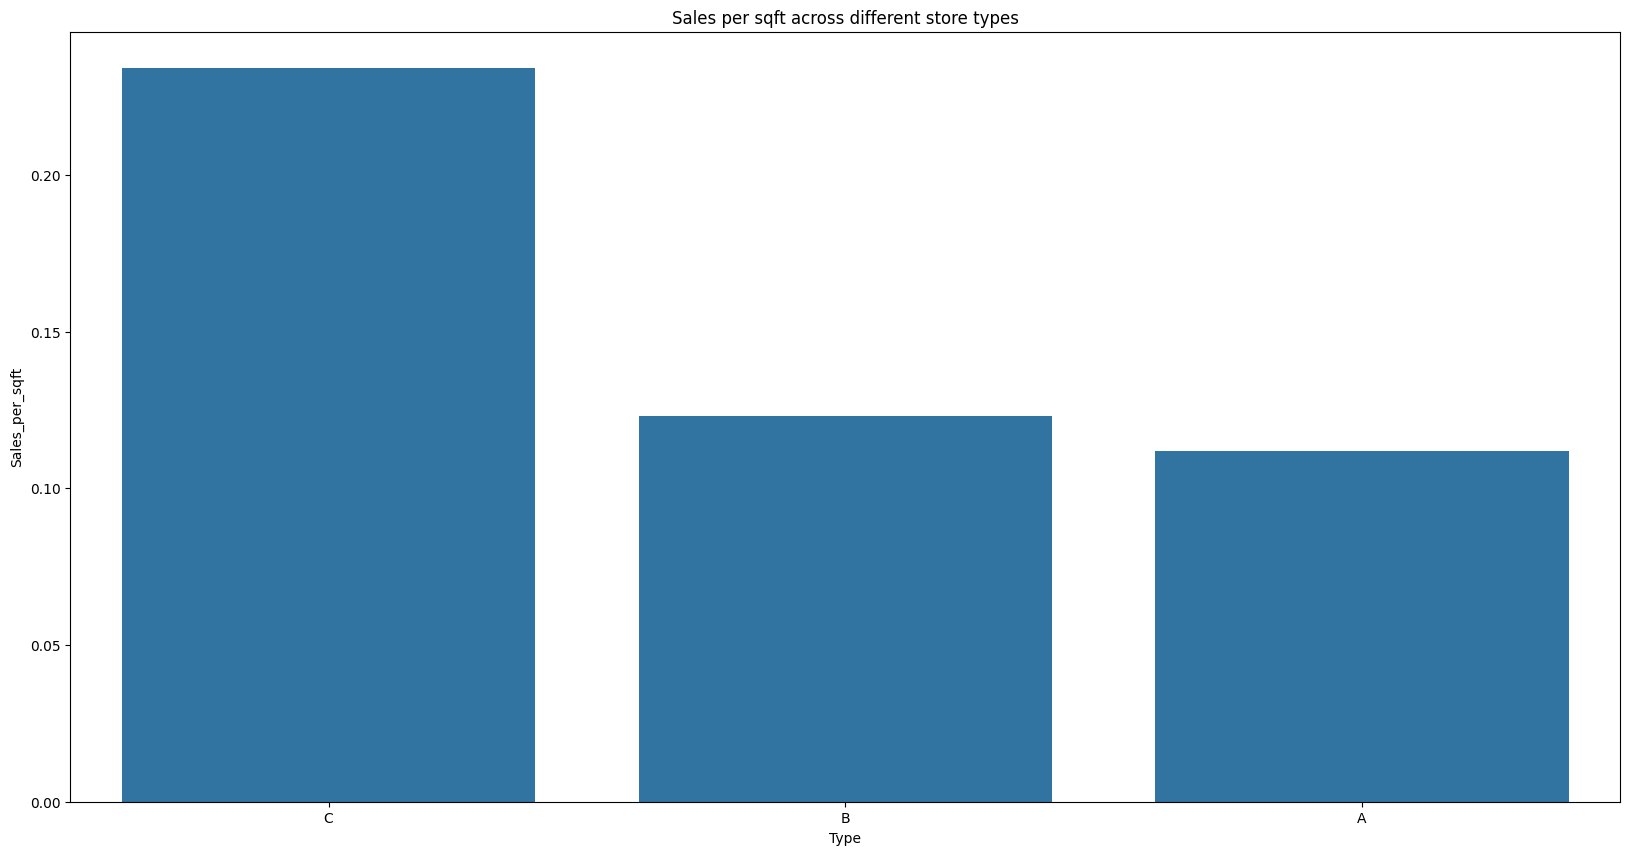

In [88]:
# which store type is the most efficient based on sales per sqft(unit area)?
sales_per_sqft_type = all_data.groupby('Type')['Sales_per_sqft'].mean().reset_index()
sales_per_sqft_type = sales_per_sqft_type.sort_values(by='Sales_per_sqft', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Type', y='Sales_per_sqft', data=sales_per_sqft_type)
plt.title('Sales per sqft across different store types')
plt.show()

<b> Key insight: while A leads the weekly sales charts, per unit of area, C does the maximum amount of weekly sales. Stores of Type C are highly efficient in that sense compared to B and A

C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_24788\1961084362.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




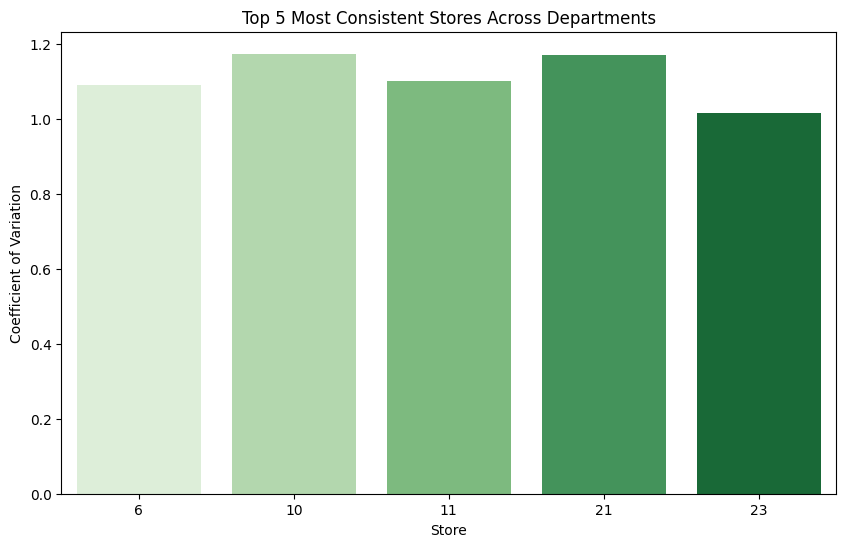

C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_24788\1961084362.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




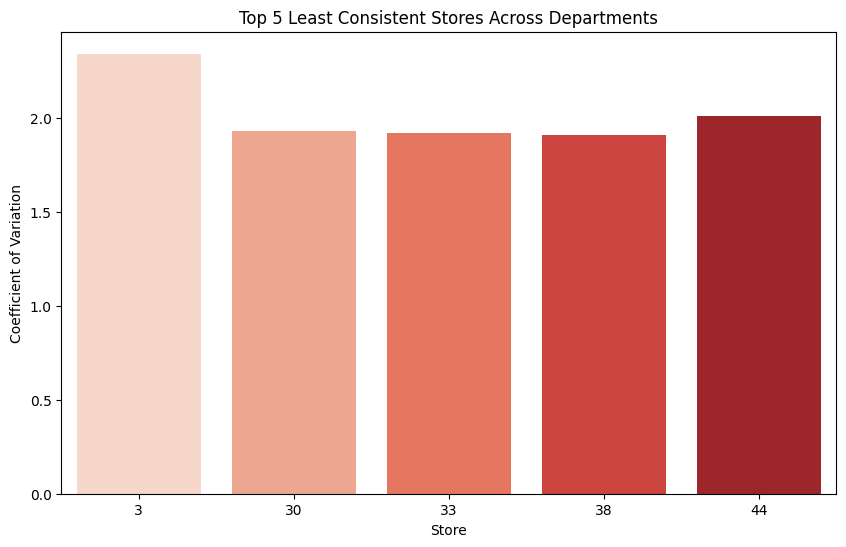


Most Consistent Stores (Lowest Coefficient of Variation):
    Store  Coefficient_of_Variation
22     23                  1.016670
5       6                  1.091133
10     11                  1.100900
20     21                  1.170379
9      10                  1.173723

Least Consistent Stores (Highest Coefficient of Variation):
    Store  Coefficient_of_Variation
2       3                  2.343220
43     44                  2.010846
29     30                  1.931936
32     33                  1.919523
37     38                  1.912116

Most Consistent Stores Type:
   Store Type
0     23    B
1      6    A
2     11    A
3     21    B
4     10    B

Least Consistent Stores Type:
   Store Type
0      3    B
1     44    C
2     30    C
3     33    A
4     38    C


In [144]:
#Which stores shows consistent sales performance across departments?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

store_dept_sales = all_data.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().reset_index()


consistency_metrics = store_dept_sales.groupby('Store')['Weekly_Sales'].agg(['mean', 'std']).reset_index()
consistency_metrics['Coefficient_of_Variation'] = consistency_metrics['std'] / consistency_metrics['mean']
consistency_metrics['Consistency_Score'] = 1 / consistency_metrics['Coefficient_of_Variation']  # Higher score means more consistent


most_consistent_stores = consistency_metrics.nsmallest(5, 'Coefficient_of_Variation')
least_consistent_stores = consistency_metrics.nlargest(5, 'Coefficient_of_Variation')



plt.figure(figsize=(10, 6))
sns.barplot(data=most_consistent_stores, x='Store', y='Coefficient_of_Variation', palette='Greens')
plt.title('Top 5 Most Consistent Stores Across Departments')
plt.xlabel('Store')
plt.ylabel('Coefficient of Variation')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=least_consistent_stores, x='Store', y='Coefficient_of_Variation', palette='Reds')
plt.title('Top 5 Least Consistent Stores Across Departments')
plt.xlabel('Store')
plt.ylabel('Coefficient of Variation')
plt.show()

print("\nMost Consistent Stores (Lowest Coefficient of Variation):")
print(most_consistent_stores[['Store', 'Coefficient_of_Variation']])

print("\nLeast Consistent Stores (Highest Coefficient of Variation):")
print(least_consistent_stores[['Store', 'Coefficient_of_Variation']])

most_consistent_stores_type = pd.merge(most_consistent_stores, stores_df, on='Store')
least_consistent_stores_type = pd.merge(least_consistent_stores, stores_df, on='Store')

print("\nMost Consistent Stores Type:")
print(most_consistent_stores_type[['Store', 'Type']])
print("\nLeast Consistent Stores Type:")
print(least_consistent_stores_type[['Store', 'Type']])

From this analsyis we can yield stores that are more consistent across departments (23,6,11,21,10) and least consistent (3,44,30,33,38). But there is not relation with regards to the type

#### Temporal Factors Impact Analysis


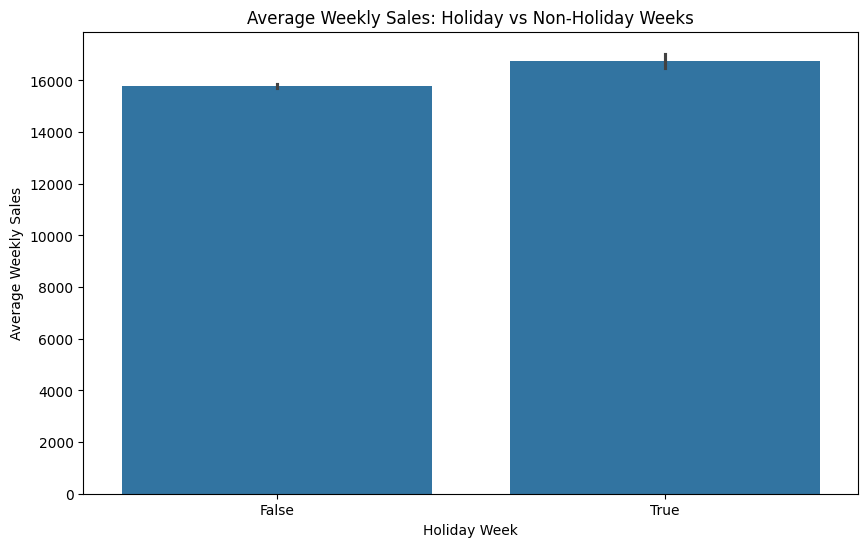


Sales Analysis - Holiday vs Non-Holiday Weeks:
               mean   count       std
IsHoliday                            
False      15780.70  396942  22219.34
True       16758.17   33078  26512.95

Sales Lift during Holiday Weeks: 6.19%


In [76]:
# What is the Sales lift during holiday weeks?
holiday_impact = all_data.groupby('IsHoliday')['Weekly_Sales'].agg(['mean', 'count', 'std']).round(2)

non_holiday_sales = holiday_impact.loc[False, 'mean']
holiday_sales = holiday_impact.loc[True, 'mean']
sales_lift = ((holiday_sales - non_holiday_sales) / non_holiday_sales * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=all_data, x='IsHoliday', y='Weekly_Sales')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Week')
plt.ylabel('Average Weekly Sales')
plt.show()

# Print results
print("\nSales Analysis - Holiday vs Non-Holiday Weeks:")
print(holiday_impact)
print(f"\nSales Lift during Holiday Weeks: {sales_lift}%")

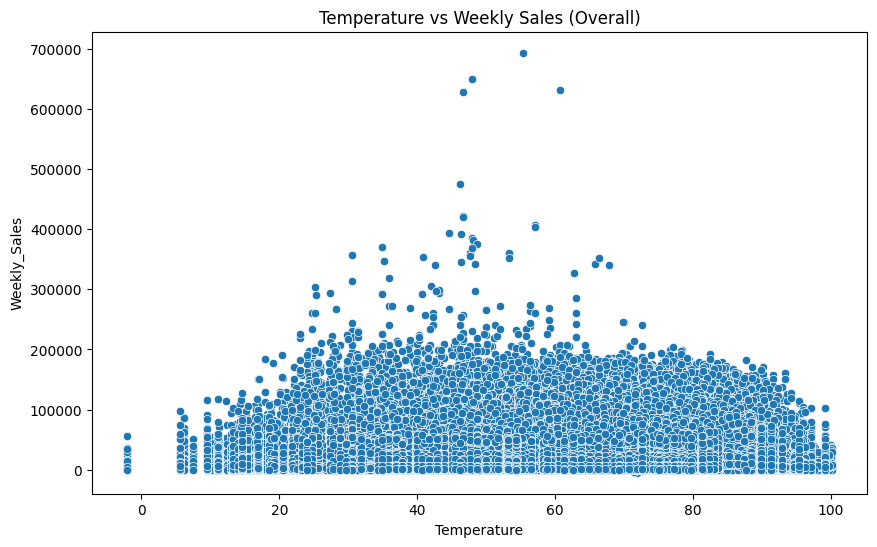

In [94]:
# Do temperature impact sales across weekly sales, across different stores, departments and store types?


plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly Sales (Overall)')
plt.show()




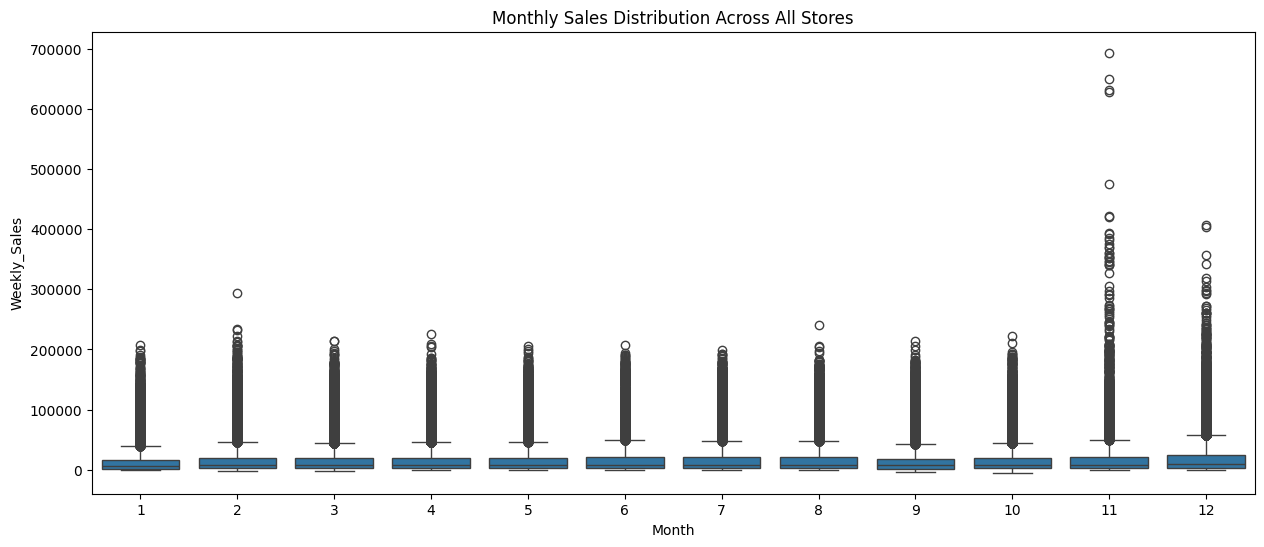

Optimal Month for Each Store:
     Store Month  Weekly_Sales
11       1   Dec  24198.965546
23       2   Dec  32130.325649
35       3   Dec   7335.025961
47       4   Dec  34564.312870
59       5   Dec   5671.617846
71       6   Dec  26741.352525
83       7   Dec  10759.757332
95       8   Dec  15334.575109
107      9   Dec  10211.457932
119     10   Dec  34255.327432
131     11   Dec  23062.844028
143     12   Dec  17886.235528
155     13   Dec  33393.448182
167     14   Dec  35046.050470
179     15   Dec  11832.420395
191     16   Dec   9861.880013
200     17   Sep  14172.188614
215     18   Dec  19411.063185
227     19   Dec  24679.907234
239     20   Dec  35622.176298
251     21   Dec  14557.969433
263     22   Dec  19297.543224
275     23   Dec  25812.647228
287     24   Dec  22129.978766
299     25   Dec  13407.108999
311     26   Dec  16268.998923
323     27   Dec  28629.338872
334     28   Nov  21035.810832
347     29   Dec  10605.137944
349     30   Feb   9017.767405
371     3

In [73]:
# Do stores have optimal seasons or months for sales?


monthly_store_sales = all_data.groupby(['Store', 'Month'])['Weekly_Sales'].mean().reset_index()
monthly_store_sales = monthly_store_sales.sort_values(['Store', 'Weekly_Sales'], ascending=[True, False])

optimal_months = monthly_store_sales.loc[monthly_store_sales.groupby('Store')['Weekly_Sales'].idxmax()]
optimal_months['Month'] = optimal_months['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                                     6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
                                                     11:'Nov', 12:'Dec'})
plt.figure(figsize=(15,6))
sns.boxplot(data=all_data, x='Month', y='Weekly_Sales')
plt.title('Monthly Sales Distribution Across All Stores')
plt.show()

print("Optimal Month for Each Store:")
print(optimal_months[['Store', 'Month', 'Weekly_Sales']])

#### Markdown Impact Analysis

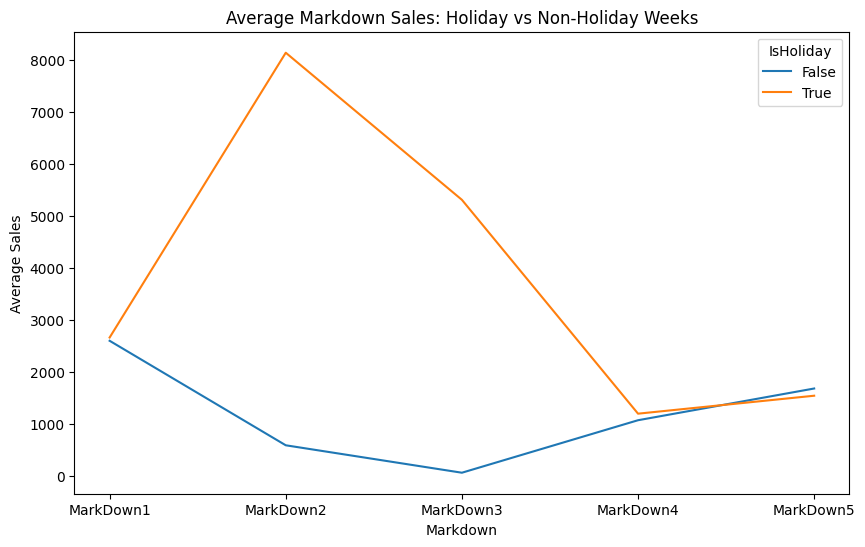

In [97]:
# Does markdown sale drive increase in weekly sales?
markdown_sales = all_data.groupby('IsHoliday')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().round(2)
markdown_sales = markdown_sales.T

markdown_sales = markdown_sales.reset_index().melt(id_vars='index', var_name='IsHoliday', value_name='Average_Sales')
markdown_sales.columns = ['Markdown', 'IsHoliday', 'Average_Sales']

plt.figure(figsize=(10, 6))
sns.lineplot(data=markdown_sales, x='Markdown', y='Average_Sales', hue='IsHoliday')
plt.title('Average Markdown Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Markdown')
plt.ylabel('Average Sales')
plt.show()

C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_24788\871113026.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



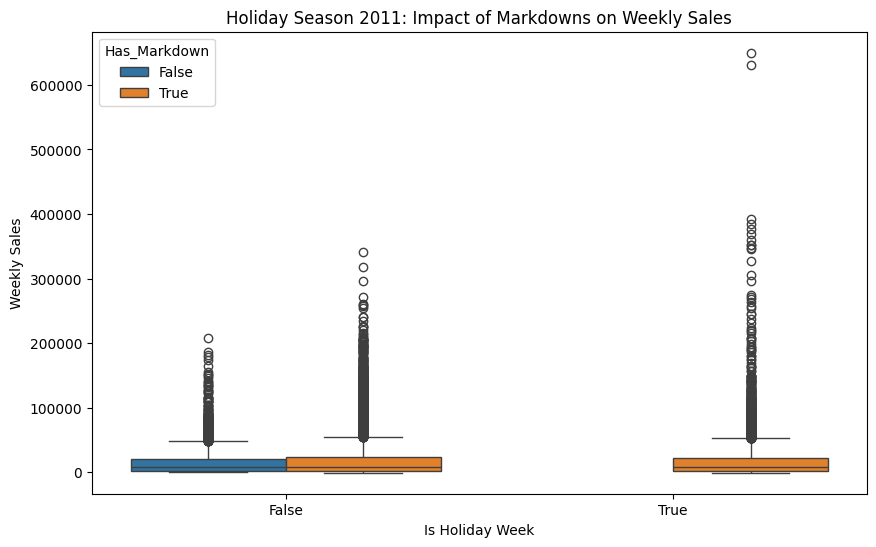


Nov-Dec 2011 Sales Analysis by Holiday and Markdown:
                            mean  count
IsHoliday Has_Markdown                 
False     False         16353.09   2992
          True          18638.49  18195
True      True          17455.17   9139

Sales lift with markdown during holiday periods: 6.74%

Sales lift with markdown during non-holiday periods: 13.98%


In [145]:
# Filter data for Nov-Dec 2011 holiday season
holiday_season = all_data[
    (all_data['Date'].dt.year == 2011) & 
    (all_data['Date'].dt.month.isin([11, 12]))
]


holiday_season['Has_Markdown'] = (
    (holiday_season['MarkDown1'] > 0) |
    (holiday_season['MarkDown2'] > 0) |
    (holiday_season['MarkDown3'] > 0) |
    (holiday_season['MarkDown4'] > 0) |
    (holiday_season['MarkDown5'] > 0)
)

sales_analysis = holiday_season.groupby(['IsHoliday', 'Has_Markdown'])['Weekly_Sales'].agg(['mean', 'count']).round(2)


plt.figure(figsize=(10, 6))
sns.boxplot(data=holiday_season, x='IsHoliday', y='Weekly_Sales', hue='Has_Markdown')
plt.title('Holiday Season 2011: Impact of Markdowns on Weekly Sales')
plt.xlabel('Is Holiday Week')
plt.ylabel('Weekly Sales')
plt.show()

print("\nNov-Dec 2011 Sales Analysis by Holiday and Markdown:")
print(sales_analysis)

for is_holiday in [True, False]:
    no_markdown = sales_analysis.loc[(False, False), 'mean'] 
    with_markdown = sales_analysis.loc[(is_holiday, True), 'mean'] 
    lift = ((with_markdown - no_markdown) / no_markdown * 100).round(2)
    print(f"\nSales lift with markdown during {'holiday' if is_holiday else 'non-holiday'} periods: {lift}%")
    

This shows that markdown helps in boosting sales during non holiday seasons, much more than holiday seasons

In [98]:
# Avg markdown amount by store, department and store type? 
markdown_sales_store = all_data.groupby('Store')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().round(2)
markdown_sales_dept = all_data.groupby('Dept')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().round(2)
markdown_sales_type = all_data.groupby('Type')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().round(2)

print("\nAverage Markdown Sales by Store:")
print(markdown_sales_store)
print("\nAverage Markdown Sales by Department:")
print(markdown_sales_dept)
print("\nAverage Markdown Sales by Store Type:")
print(markdown_sales_type)


Average Markdown Sales by Store:
       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
Store                                                       
1        2907.20    1192.47     434.86    1337.98    1815.59
2        3846.66    2215.00     604.67    1700.73    2347.52
3        1107.22     394.57     286.91     315.93     457.74
4        3353.59    1875.36     684.56    1832.16    2455.79
5        1085.44     423.90     233.77     393.31     917.35
6        3036.29    1834.45     664.44    1327.98    2018.28
7        2305.41     568.87     310.27     615.05    1275.12
8        2530.55    1055.47     369.15     603.03    2048.70
9        1165.91     382.52     346.55     360.85    1363.73
10       3468.39    2187.00    1098.79    1538.63    1927.37
11       3205.94    1410.62     575.07    1276.58    1995.06
12       4104.20    1560.98     499.74    1821.15    2081.56
13       3980.76    2458.45    1018.73    1791.20    2597.59
14       4167.38    2046.89     737.59    1511.08  

In General due to presumably its larger size and scale of stores, A has a greater average markdown rate as compared to B and C.

Text(0.5, 1.0, 'Average Markdown Sales by Store Type')

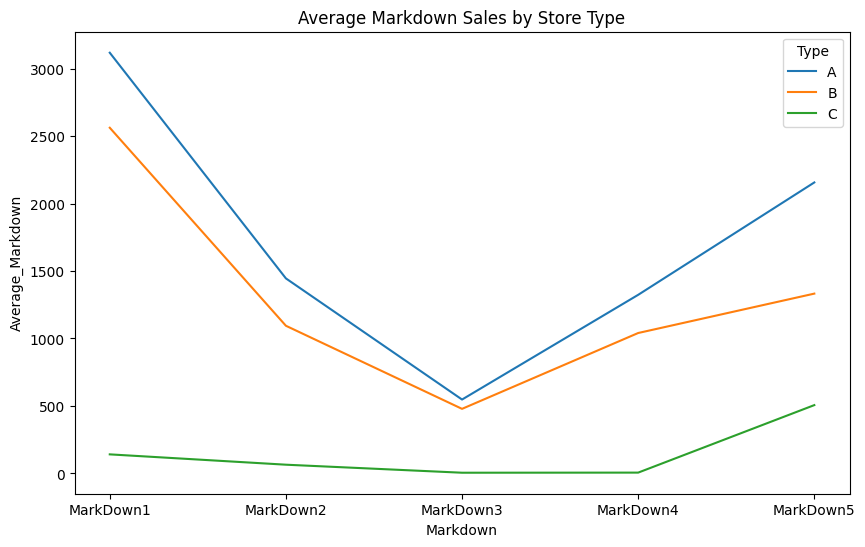

In [146]:
# do store area and type impact markdown sales?
markdown_sales_area = all_data.groupby('Type')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().round(2)
markdown_sales_area = markdown_sales_area.T

markdown_sales_area = markdown_sales_area.reset_index().melt(id_vars='index', var_name='Type', value_name='Average_Markdown')
markdown_sales_area.columns = ['Markdown', 'Type', 'Average_Markdown']

plt.figure(figsize=(10, 6))
sns.lineplot(data=markdown_sales_area, x='Markdown', y='Average_Markdown', hue='Type')
plt.title('Average Markdown Sales by Store Type')




#### Economic Impact Analysis

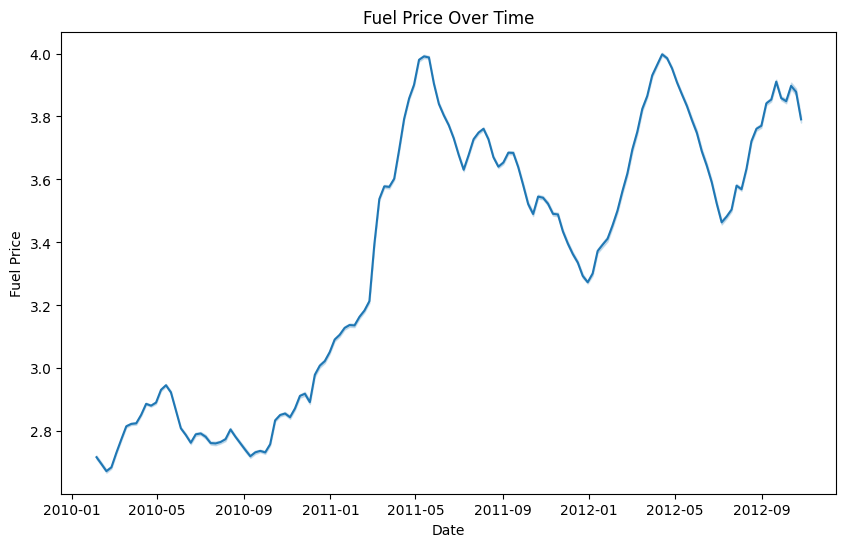


Correlation between Fuel Price and Weekly Sales: -0.0


In [113]:
# Change in fuel prices over time and its impact on sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='Date', y='Fuel_Price')
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.show()




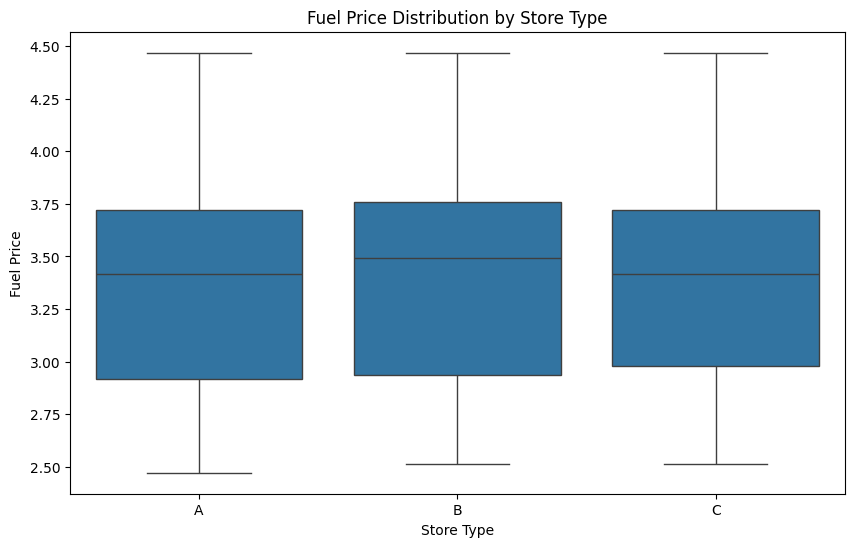

In [114]:
# Is there a relation between fuel prices and the type of store?
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_data, x='Type', y='Fuel_Price')
plt.title('Fuel Price Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Fuel Price')
plt.show()

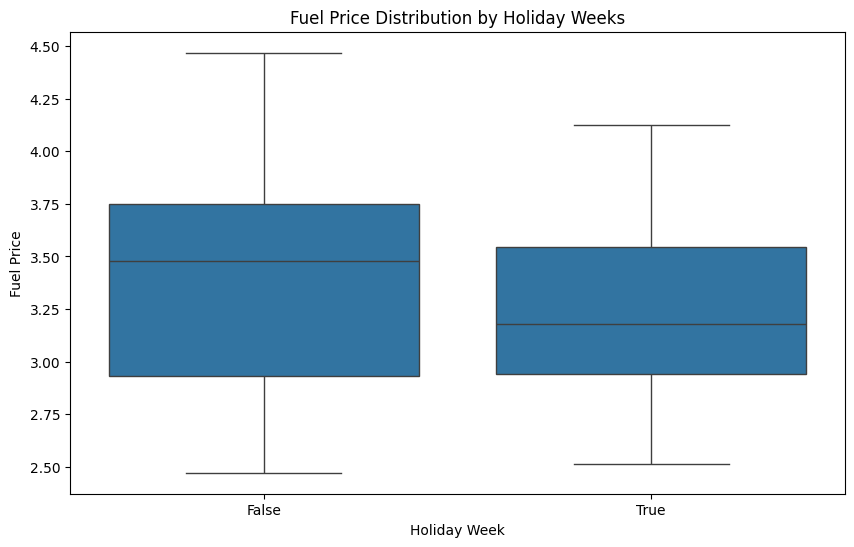

In [115]:
# Is there relation between fuel prices and holiday weeks?
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_data, x='IsHoliday', y='Fuel_Price')
plt.title('Fuel Price Distribution by Holiday Weeks')
plt.xlabel('Holiday Week')
plt.ylabel('Fuel Price')
plt.show()

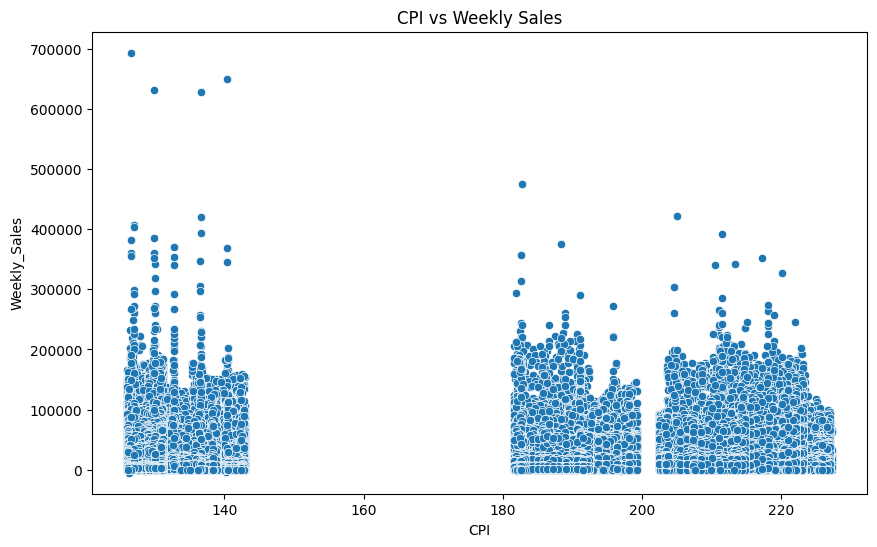

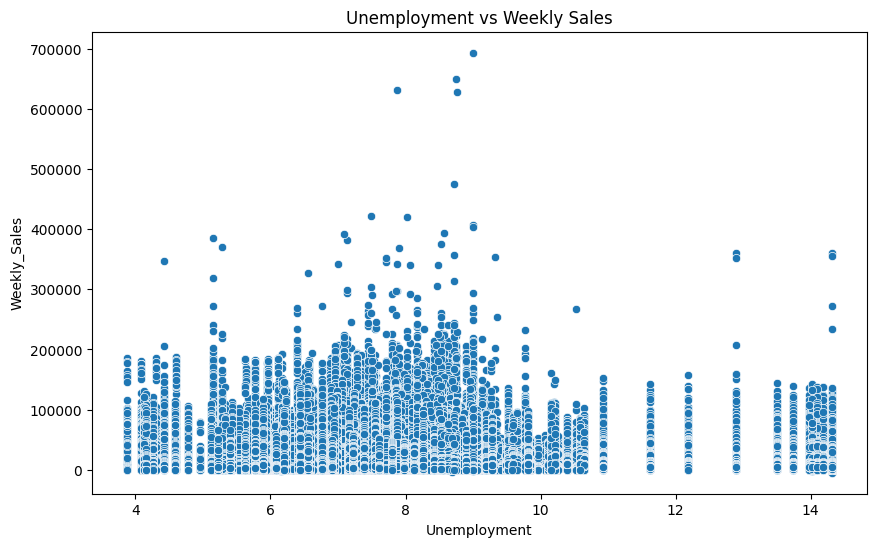

In [121]:
# Relation between economic factors like CPI, Unemployment and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployment vs Weekly Sales')
plt.show()



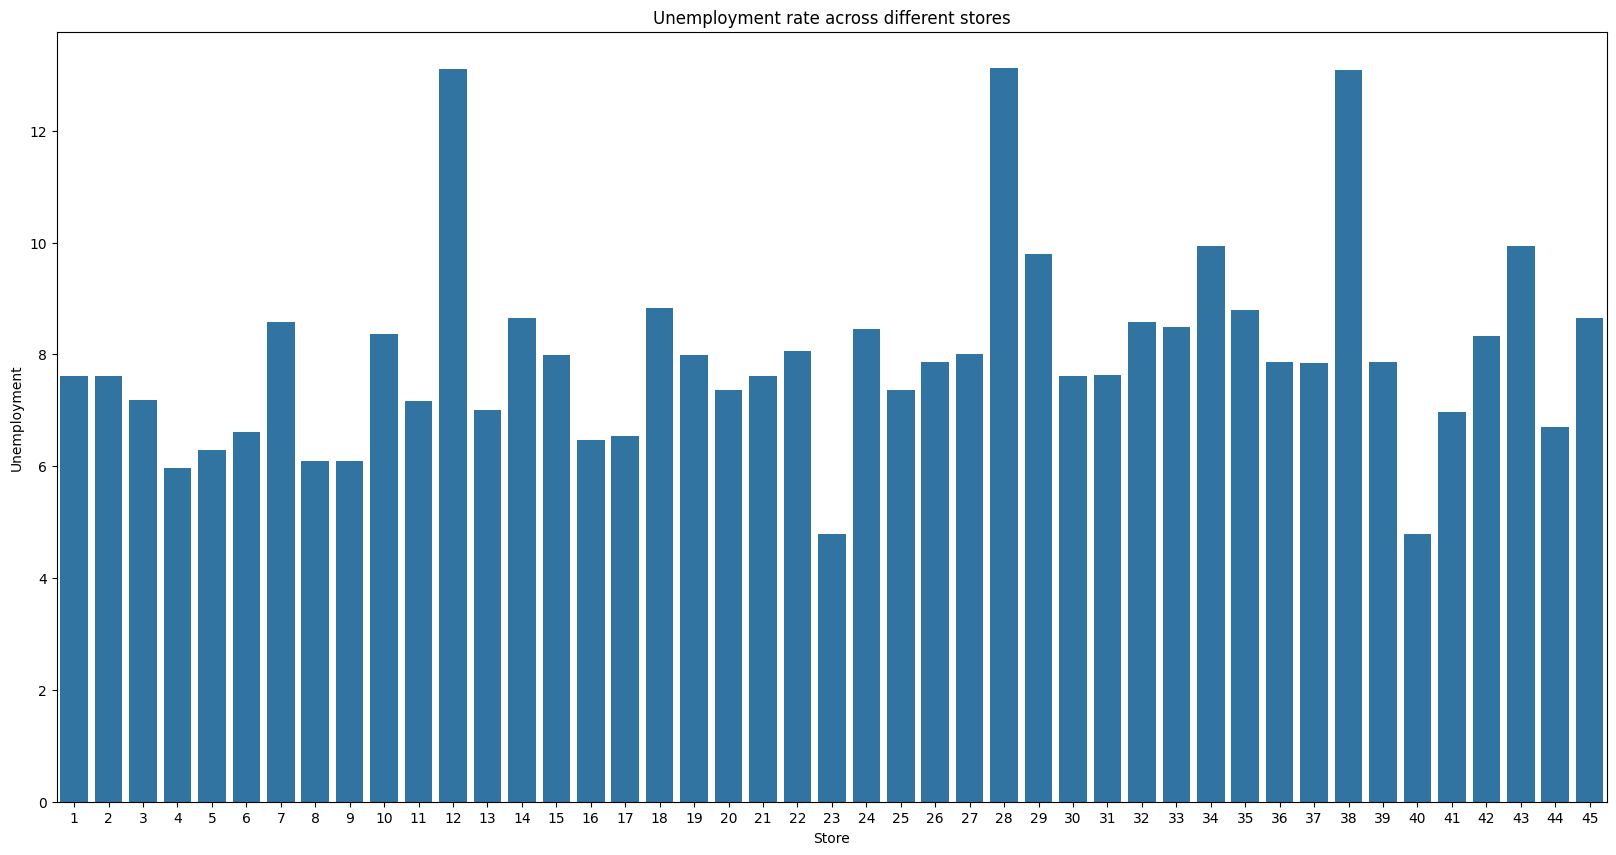

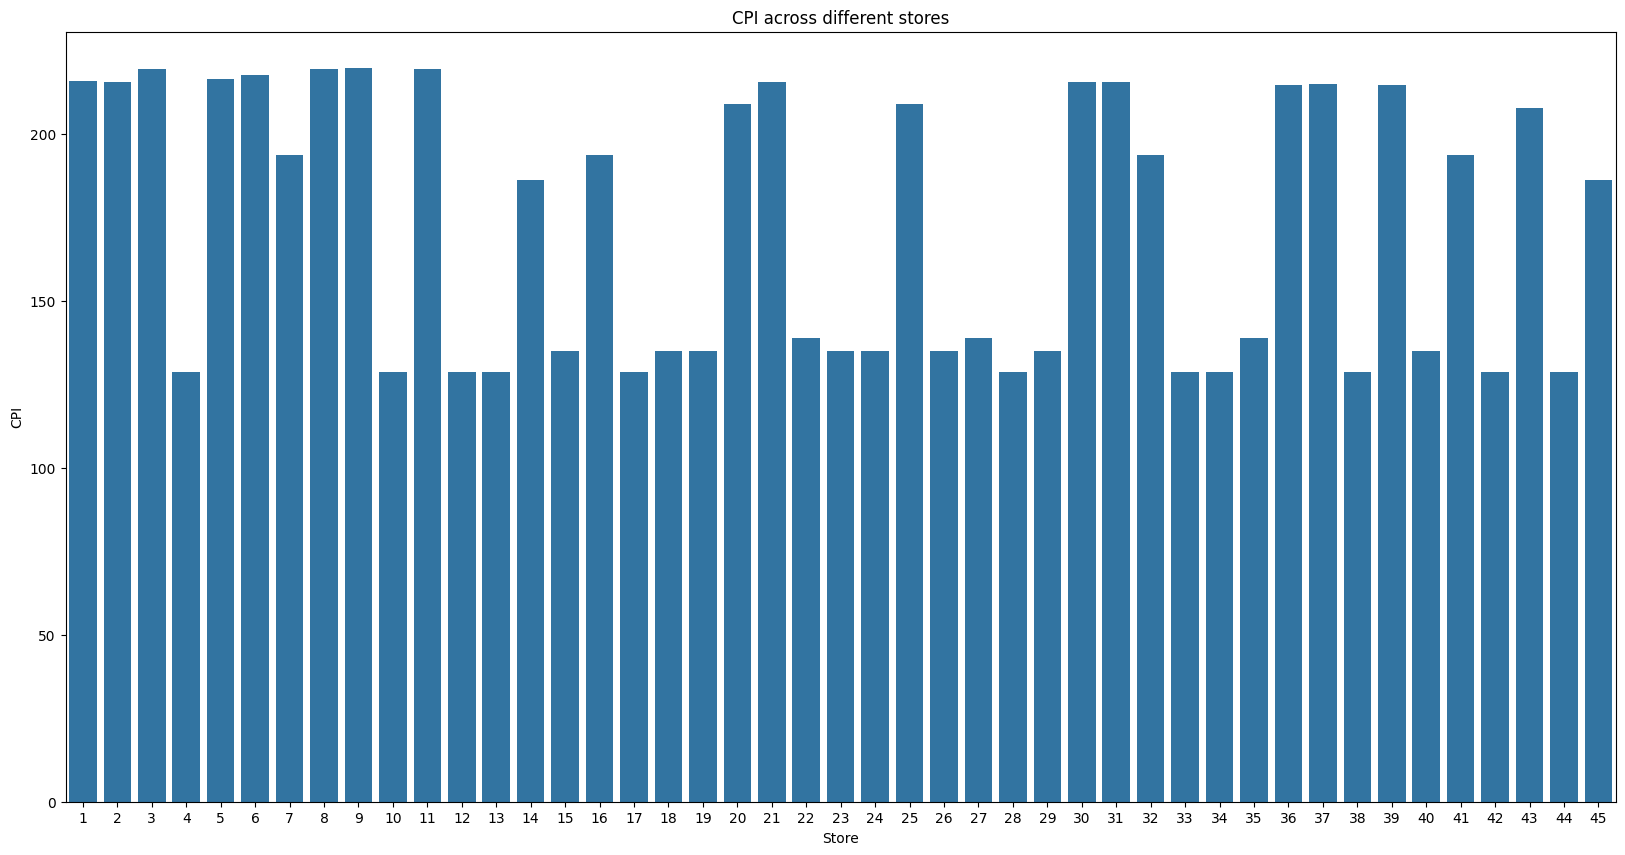

In [150]:
# What is the impact of unemployment rate & CPI on sales?
unemployment_sales = all_data.groupby('Store')['Unemployment'].mean().reset_index()
unemployment_sales = unemployment_sales.sort_values(by='Unemployment', ascending=False)

cpi_sales = all_data.groupby('Store')['CPI'].mean().reset_index()
cpi_sales = cpi_sales.sort_values(by='CPI', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='Unemployment', data=unemployment_sales)
plt.title('Unemployment rate across different stores')

plt.figure(figsize=(20,10))
sns.barplot(x='Store', y='CPI', data=cpi_sales)
plt.title('CPI across different stores')
plt.show()





Overall Correlation between Weekly Sales and Economic Factors:
Unemployment   -0.03
CPI            -0.02
Name: Weekly_Sales, dtype: float64

Lagged Correlation between Weekly Sales and Economic Factors:
Unemployment_Lag1   -0.02
CPI_Lag1            -0.02
Name: Weekly_Sales, dtype: float64


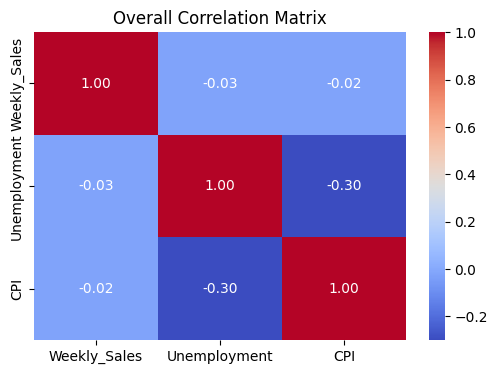

In [151]:
economic_factors = all_data[['Weekly_Sales', 'Unemployment', 'CPI']]

overall_corr = economic_factors.corr().loc['Weekly_Sales', ['Unemployment', 'CPI']].round(2)

print("\nOverall Correlation between Weekly Sales and Economic Factors:")
print(overall_corr)


all_data['Unemployment_Lag1'] = all_data['Unemployment'].shift(1)
all_data['CPI_Lag1'] = all_data['CPI'].shift(1)


lagged_data = all_data.dropna(subset=['Unemployment_Lag1', 'CPI_Lag1'])
lagged_corr = lagged_data[['Weekly_Sales', 'Unemployment_Lag1', 'CPI_Lag1']].corr().loc['Weekly_Sales', ['Unemployment_Lag1', 'CPI_Lag1']].round(2)

print("\nLagged Correlation between Weekly Sales and Economic Factors:")
print(lagged_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(economic_factors.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Overall Correlation Matrix')
plt.show()

No relation or direct impact on sales after further analysis

# Conclusion

## Top Insights 
Most important Data Summary Points


 Relations mostly the feature impact towards weekly sales
 - Store type A is the highest selling store type, followed by B and C . Data Across all years.
 - Store Types and Areas are correlated -> Store Type A having the largest Area while C the smallest - presumably indicating the size of the stores
 - Highest Selling Stores Overall - 20, followed by 4 & 14  Lowest Selling Stores overall - 38 followed by 36 & 5.
 - Highest selling departments across stores overall - 92,95 Lowest Selling Departmnets across Stores overall - 51,78 - Data coincides with store performance Departments having highest performance tend to be the highest performing particularly in such stores. eg. 92 is high performing department in 20,14,13.
 - December is the Top sellilng month - in 2011,2010. And generally the trend (due to lack of data for 2012 december). Holiday season.  January is the lowest selling month - post holiday season drought.
- Weekly Sales not correlated with any variable, appear to be correlated slightly with Area. Larger the Area of stores - Higher the sales. Business insight - target larger stores.
- Stores 43,43 are highest efficent - Highest amount of sales per unit area
- While A leads the weekly sales, C is the most efficient - Stores of Type C is the highest selling per unit area.
- Stores 23,21,11 are most consistent across departments(does the same amount of sales) while stores 44,38,33,30,3 are least consistent
- On Checking for the Nov-Dec 2011 season - Sales shift with markdown during holiday periods : 6.74%, and non-holiday periods: 13.98%. Markdown boosts sales in holiday, compared to non holiday periods. These months are chosen due to high sales and availability of markdown data.
- There Doesn't seem to be any relation between temperature, Fuel, CPI, Unemployment rate on Weekly sales of stores.


## Most Important Questions that can be answered

Questions can be answered grouped into broad categories
1. Store Type Performances wrt Weekly Sales . HOw Store type influence weekly sales across years? What factors might contribute to A being the highest selling store type?
2. What are the top and bottom performing stores, departments?
3. What is the impact of Store area with respect to Weekly Sales?
4. What Season is recorded to have the highest Weekly sales figures based on data? What particular month is highly likely? The information can be used to boost targeted marketing and add campaigns to boost sales.
5. As the retail owner, what is the ideal store setup that I can create? A top selling store, a consistent one or an efficient one?
6. What strategy can be taken to boost sales post or non holiday seasons? Would markdown be an efficent strategy?
7. Which underperforming stores require addiional support so that they can improve their consistency? What are the overall lowest selling departments where we can reduce marketing budget and redirect it to high selling to make larger profits?
8. How has Stores evolved over the years in their performance? what are the consistent high selling departments over the years? and What strategies they can adapt to boost their sales?


## Data Issues

- Unavailiability of markdown data with lot of Nan values which makes it difficult to progress
- Lack of clarity on markdown units as well as the lack of data, may make the sales shift percentage claim not credible.
- Lack of information on types of departments or stores to avail more detailed analysis.
- Temperature data is regional and might not directly reflect the temp on store's location. Even while data as per initial analysis is not directly helpful to relate to weekly sales.

